<a href="https://colab.research.google.com/github/Yutthana-BJ/Data_Analytics_Projects/blob/main/FP_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import cm
from google.colab import drive
drive.mount('/content/drive')
Solar_Consumption_W1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Solar_Consumption_W1.xlsx'
Solar_Consumption_F1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Solar_Consumption_F1.xlsx'
Environment_W1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Environment_W1.xlsx'
Environment_F1 = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Environment_F1.xlsx'
Peak_Calendar = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Frasers_Property [Take_Home]/Peak_Calendar.xlsx'

Mounted at /content/drive


# **Warehouse: W1**

In [ ]:
df_E_W1 = pd.read_excel(Environment_W1)
df_E_W1['Plant'] = df_E_W1['Device'].str[:12]
df_E_W1['Device'] = df_E_W1['Device'].str[13:]
df_E_W1 = df_E_W1[['Plant'] + [col for col in df_E_W1.columns if col != 'Plant']]
df_E_W1.head(5)

Plant            Datetime      Device    Area  Humidity  Temperature
0  warehouse_w1 2022-04-01 00:00:00  ambient_f1  Inside      74.5         30.7
1  warehouse_w1 2022-04-01 00:10:00  ambient_f1  Inside      74.5         30.8
2  warehouse_w1 2022-04-01 00:15:00  ambient_f1  Inside      74.5         30.8
3  warehouse_w1 2022-04-01 00:20:00  ambient_f1  Inside      75.0         30.8
4  warehouse_w1 2022-04-01 00:30:00  ambient_f1  Inside      75.0         30.8

In [ ]:
dfs = []

grouped_dfs = {device: data for device, data in df_E_W1.groupby('Device')}
for device, data in grouped_dfs.items():
    globals()[f"df_E_W1_{device}"] = data
    grouped = data.groupby(pd.Grouper(key='Datetime', freq='H'))
    df = grouped.agg({'Plant': ['first'], 'Device': ['first'], 'Area': ['first'], 'Humidity': ['mean'], 'Temperature': ['mean']})
    df.columns = ['Plant', 'Device', 'Area', 'Humidity_mean', 'Temperature_mean']
    df.reset_index(inplace=True)
    dfs.append(df)

df_E_W1 = pd.concat(dfs, ignore_index=True)
df_E_W1['Date'] = pd.to_datetime(df_E_W1['Datetime'].dt.date)
df_E_W1['Time'] = df_E_W1['Datetime'].dt.time
df_E_W1 = df_E_W1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_W1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          17472 non-null  datetime64[ns]
 1   Plant             17208 non-null  object        
 2   Device            17208 non-null  object        
 3   Area              17208 non-null  object        
 4   Humidity_mean     17208 non-null  float64       
 5   Temperature_mean  17208 non-null  float64       
 6   Date              17472 non-null  datetime64[ns]
 7   Time              17472 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
#device_error = df_E_W1[df_E_W1.isnull().any(axis=1)]
#device_error = device_error[['Date', 'Time']].value_counts().sort_index().reset_index()
#device_error

In [ ]:
device_type = df_E_W1[df_E_W1['Device'].notnull()]['Device'].unique().tolist()

def update_device(row):
    if pd.isna(row['Device']):
        return device_type[row.name % len(device_type)]
    else:
        return row['Device']

def update_area_W1(row):
    if row['Device'] in ['ambient_f1', 'ambient_f2', 'ambient_f3', 'pillar_2m', 'pillar_4m', 'pillar_6m', 'pillar_12m']:
        return 'Inside'
    elif row['Device'] in ['outdoor']:
        return 'Outside'
    else:
        return row['Area']

df_E_W1['Plant'] = 'Warehouse W1'
df_E_W1['Device'] = df_E_W1.apply(update_device, axis=1)
df_E_W1['Area'] = df_E_W1.apply(update_area_W1, axis=1)
df_E_W1['Humidity_mean'] = df_E_W1.groupby(['Device', 'Time'])['Humidity_mean'].transform(lambda x: x.fillna(x.median()))
df_E_W1['Temperature_mean'] = df_E_W1.groupby(['Device', 'Time'])['Temperature_mean'].transform(lambda x: x.fillna(x.median()))
df_E_W1 = df_E_W1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_W1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          17472 non-null  datetime64[ns]
 1   Plant             17472 non-null  object        
 2   Device            17472 non-null  object        
 3   Area              17472 non-null  object        
 4   Humidity_mean     17472 non-null  float64       
 5   Temperature_mean  17472 non-null  float64       
 6   Date              17472 non-null  datetime64[ns]
 7   Time              17472 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 1.1+ MB


<ipython-input-7-e73b71b87114>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-7-e73b71b87114>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group, x='Time', y='Humidity_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-7-e73b71b87114>:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=group, x='Time', y='Humidity_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-7-e73b71b87114>:11: UserWarning: The palette list has more values (17472) than needed (24), which may not be intended.
 

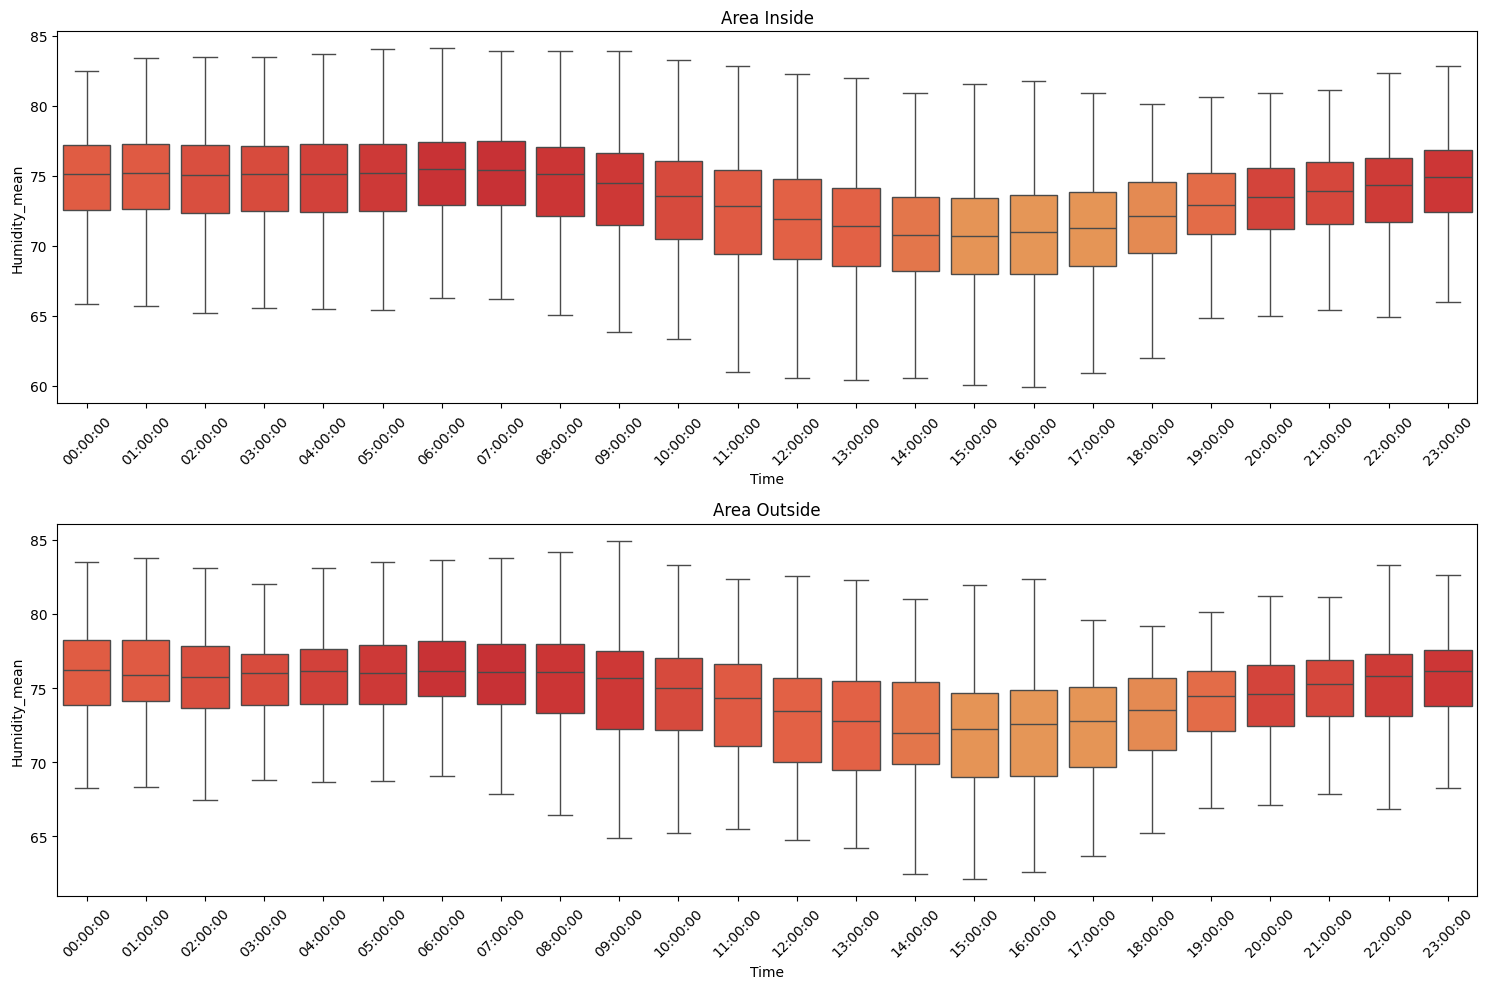

In [ ]:
norm = Normalize(vmin=df_E_W1['Humidity_mean'].min(), vmax=df_E_W1['Humidity_mean'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_E_W1['Humidity_mean']))

grouped = df_E_W1.groupby('Area')

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

for i, (area, group) in enumerate(grouped):
    ax = axs[i]
    sns.boxplot(data=group, x='Time', y='Humidity_mean', palette=colors, showfliers=False, ax=ax)
    ax.set_title(f'Area {area}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Humidity_mean')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-8-1b1b80dd7484>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-8-1b1b80dd7484>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group, x='Time', y='Temperature_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-8-1b1b80dd7484>:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=group, x='Time', y='Temperature_mean', palette=colors, showfliers=False, ax=ax)
<ipython-input-8-1b1b80dd7484>:11: UserWarning: The palette list has more values (17472) than needed (24), which may not be inten

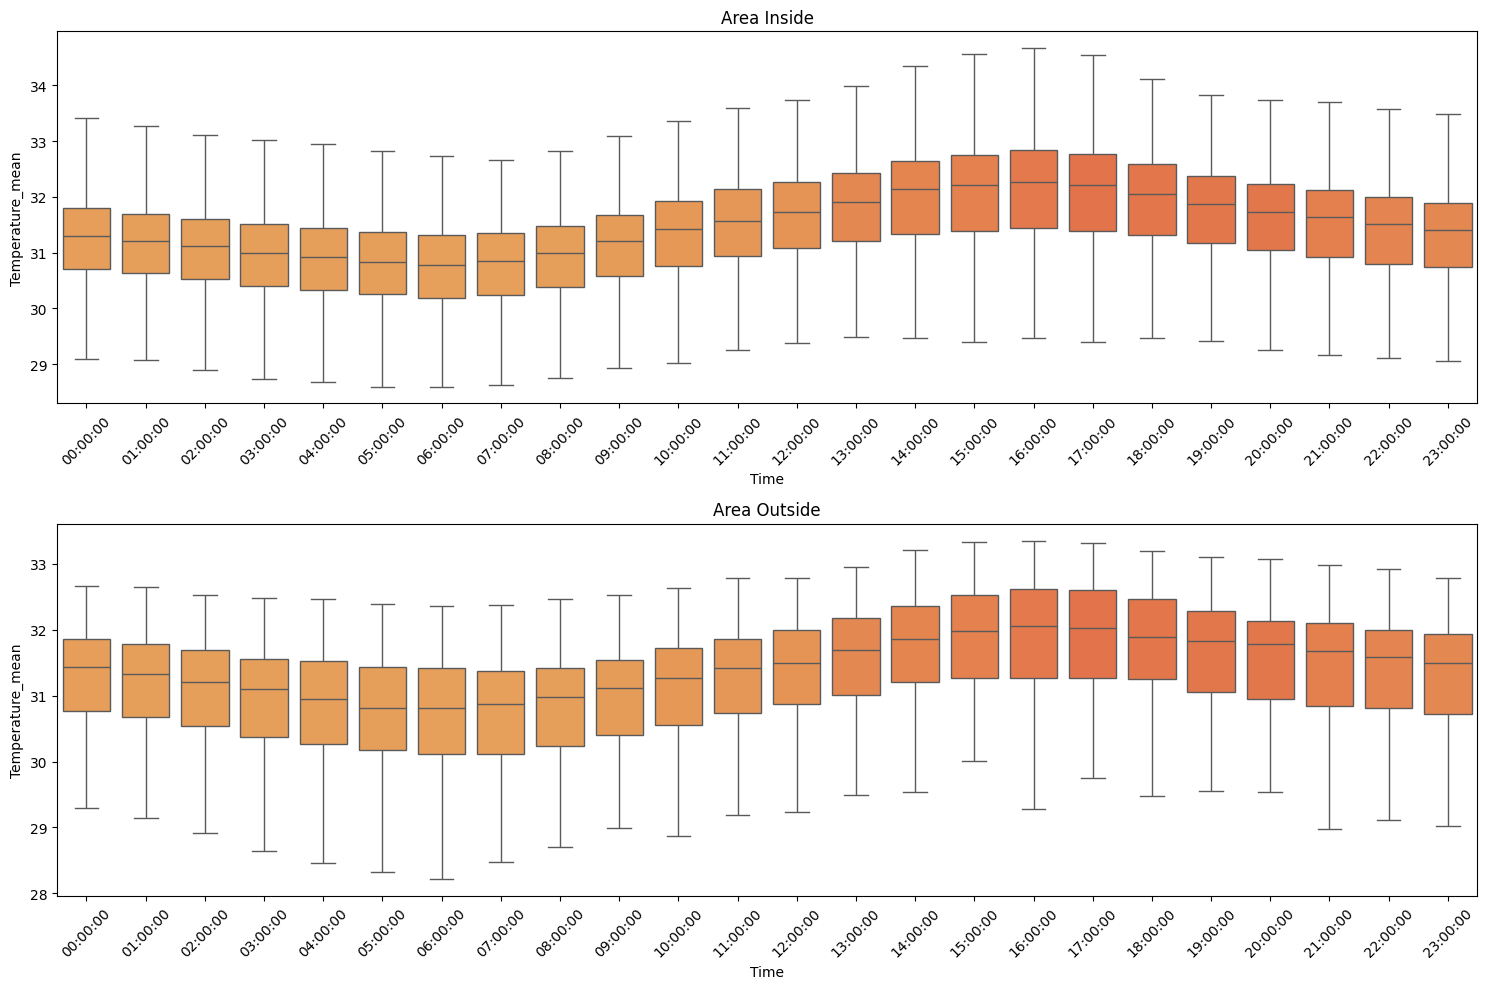

In [ ]:
norm = Normalize(vmin=df_E_W1['Temperature_mean'].min(), vmax=df_E_W1['Temperature_mean'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_E_W1['Temperature_mean']))

grouped = df_E_W1.groupby('Area')

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

for i, (area, group) in enumerate(grouped):
    ax = axs[i]
    sns.boxplot(data=group, x='Time', y='Temperature_mean', palette=colors, showfliers=False, ax=ax)
    ax.set_title(f'Area {area}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature_mean')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

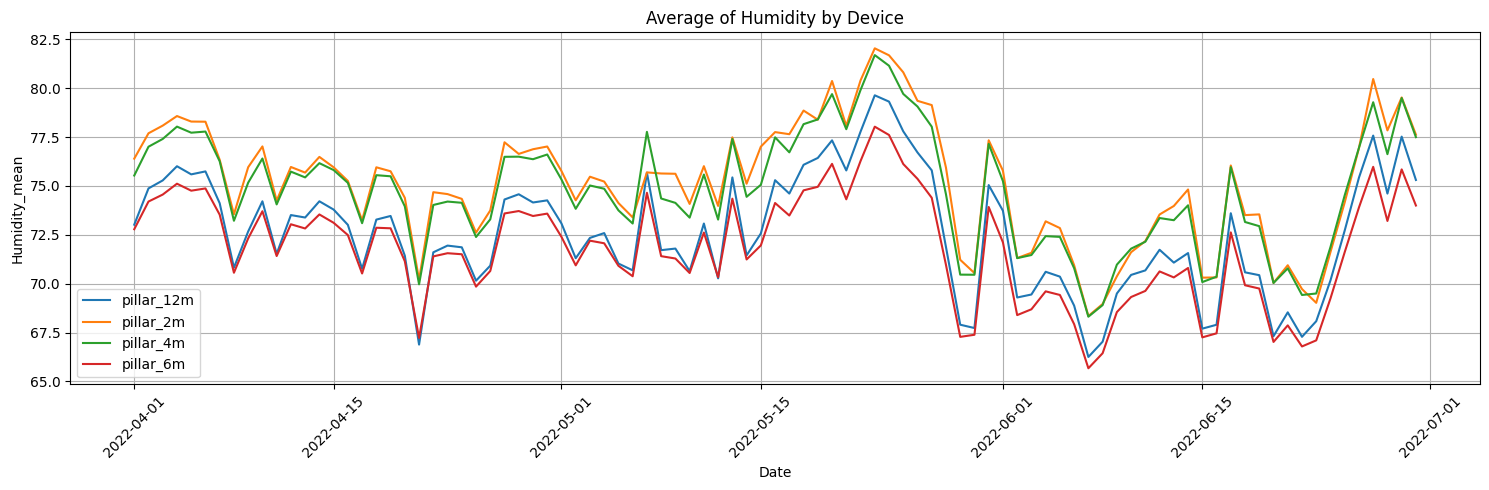

In [ ]:
grouped = df_E_W1[df_E_W1['Device'].isin(['pillar_2m', 'pillar_4m', 'pillar_6m', 'pillar_12m'])]
grouped = grouped.groupby(['Device', 'Date'])['Humidity_mean'].mean()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for device in grouped['Device'].unique():
    device_data = grouped[grouped['Device'] == device]
    ax.plot(device_data['Date'], device_data['Humidity_mean'], label=device)

plt.title('Average of Humidity by Device')
ax.set_xlabel('Date')
ax.set_ylabel('Humidity_mean')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

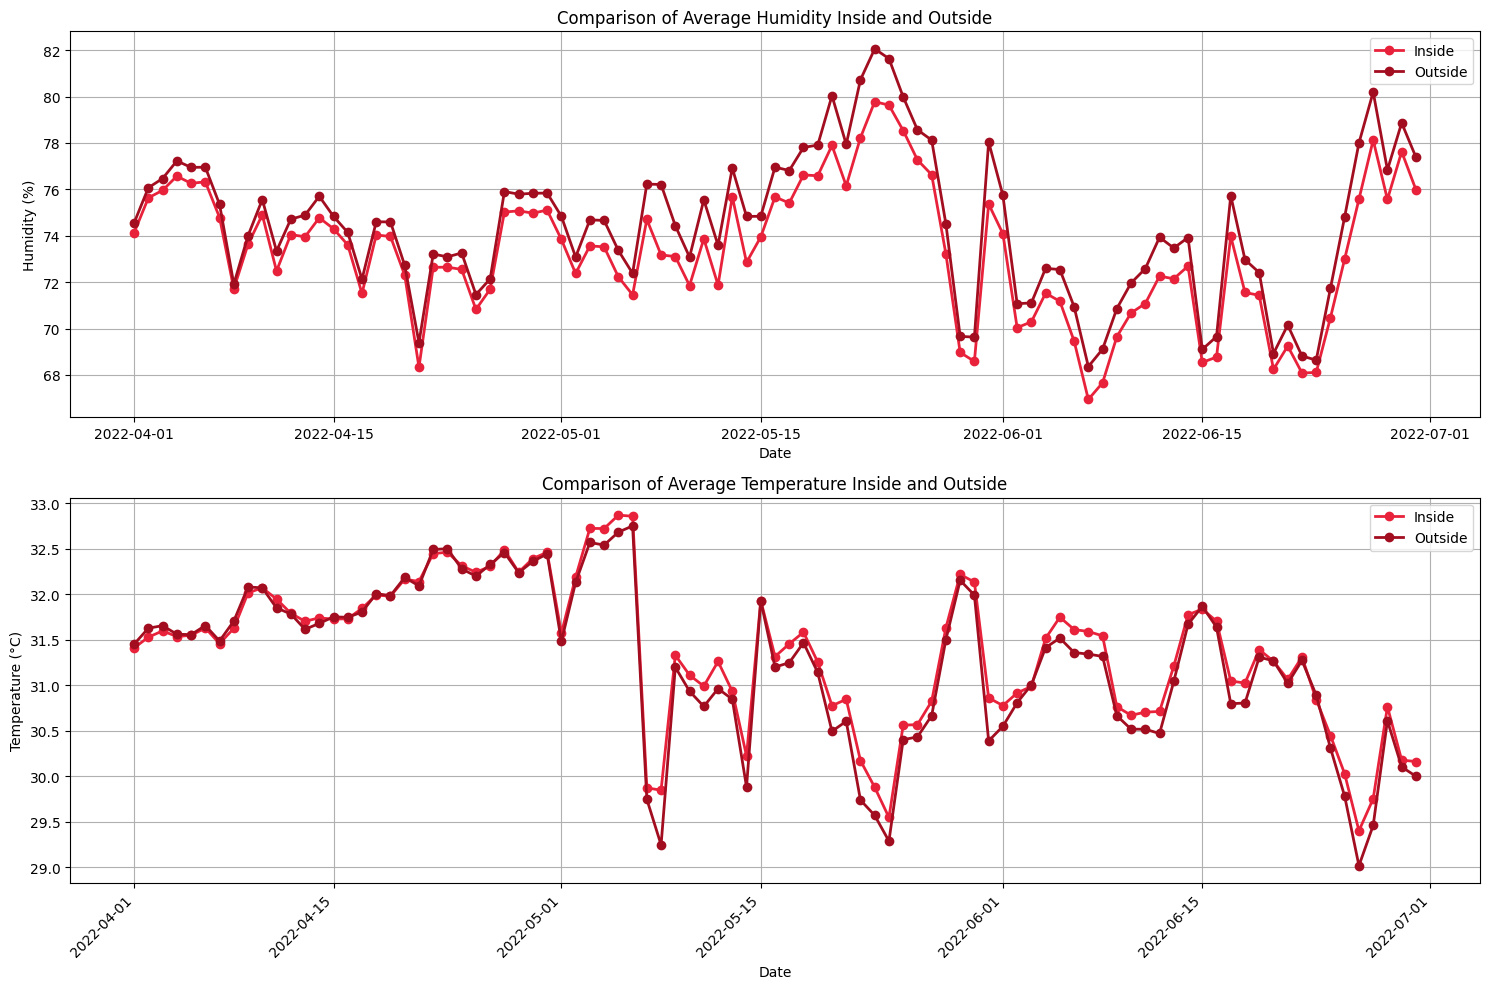

In [ ]:
grouped = df_E_W1.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

colors = {'Inside': '#e8223b', 'Outside': '#a20e20'}
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], label=area, marker='o', linewidth=2, color=colors[area])

ax1.set_title('Comparison of Average Humidity Inside and Outside')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity (%)')
ax1.legend()
ax1.grid(True)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], label=area, marker='o', linewidth=2, color=colors[area])

ax2.set_title('Comparison of Average Temperature Inside and Outside')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

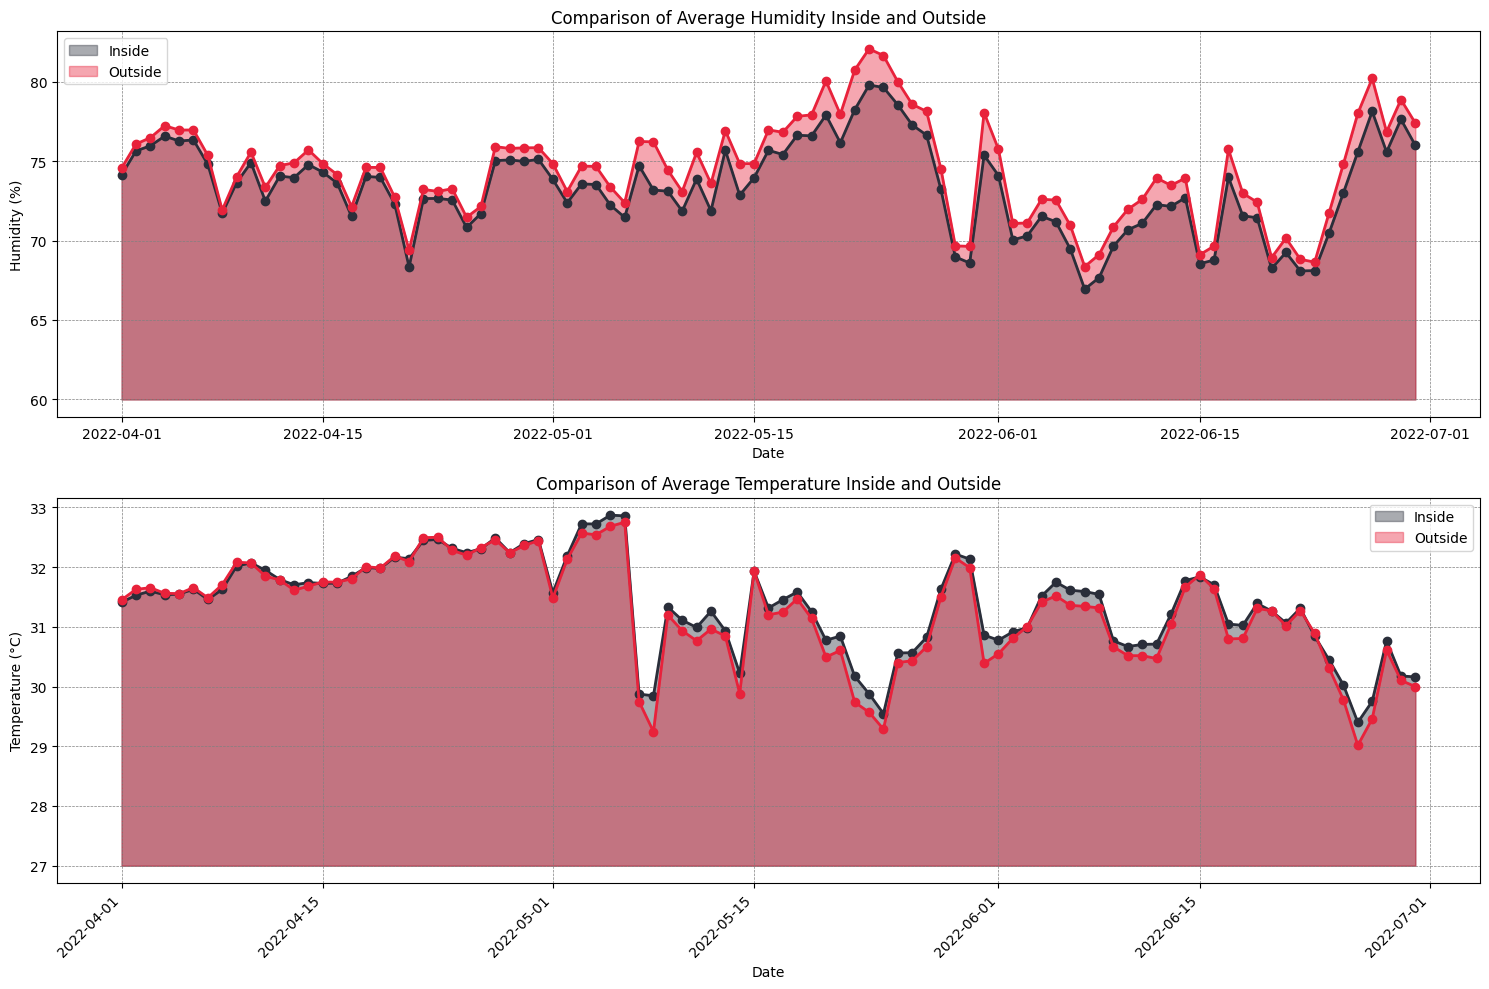

In [ ]:
grouped = df_E_W1.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

colors = {'Inside': '#2a2e3a', 'Outside': '#e8223b'}
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.fill_between(area_data['Date'], 60, area_data['Humidity_mean'], label=area, alpha=0.4, color=colors[area])
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], marker='o', linewidth=2, color=colors[area])

ax1.set_title('Comparison of Average Humidity Inside and Outside')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity (%)')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.fill_between(area_data['Date'], 27, area_data['Temperature_mean'], label=area, alpha=0.4, color=colors[area])
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], marker='o', linewidth=2, color=colors[area])

ax2.set_title('Comparison of Average Temperature Inside and Outside')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#
df_E_W1_Outside = df_E_W1[df_E_W1['Area'] == 'Outside']
df_E_W1_Outside = df_E_W1_Outside[['Datetime', 'Humidity_mean', 'Temperature_mean']].reset_index(drop=True)

#
df_SC_W1 = pd.read_excel(Solar_Consumption_W1)
df_SC_W1 = pd.merge(df_SC_W1, df_E_W1_Outside, on='Datetime', how='outer')
df_SC_W1['Date'] = pd.to_datetime(df_SC_W1['Datetime'].dt.date)
df_SC_W1['Time'] = df_SC_W1['Datetime'].dt.time

#
df_SC_W1.info()
df_SC_W1[df_SC_W1.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2182 non-null   object        
 1   Datetime            2184 non-null   datetime64[ns]
 2   Global Irradiation  2163 non-null   float64       
 3   Inverter Yield      1424 non-null   float64       
 4   Export Energy       2163 non-null   float64       
 5   Self Consumption    2163 non-null   float64       
 6   Humidity_mean       2184 non-null   float64       
 7   Temperature_mean    2184 non-null   float64       
 8   Date                2184 non-null   datetime64[ns]
 9   Time                2184 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 170.8+ KB


Plant            Datetime  Global Irradiation  Inverter Yield  \
1     Warehouse W1 2022-04-01 01:00:00                 0.0             NaN   
2     Warehouse W1 2022-04-01 02:00:00                 0.0             NaN   
3     Warehouse W1 2022-04-01 03:00:00                 0.0             NaN   
4     Warehouse W1 2022-04-01 04:00:00                 0.0             NaN   
19    Warehouse W1 2022-04-01 19:00:00                 0.0             NaN   
...            ...                 ...                 ...             ...   
2179  Warehouse W1 2022-06-30 21:00:00                 0.0             NaN   
2180  Warehouse W1 2022-06-30 22:00:00                 0.0             NaN   
2181  Warehouse W1 2022-06-30 23:00:00                 0.0             NaN   
2182           NaN 2022-06-04 23:00:00                 NaN             NaN   
2183           NaN 2022-06-05 23:00:00                 NaN             NaN   

      Export Energy  Self Consumption  Humidity_mean  Temperature_mean  \
1               0.0               0.0      74.857143         30.971429   
2               0.0               0.0      75.777778         30.933333   
3               0.0               0.0      76.437500         30.900000   
4               0.0               0.0      77.500000         30.862500   
19              0.0               0.0      72.937500         32.037500   
...             ...               ...            ...               ...   
2179            0.0               0.0      76.111111         29.288889   
2180            0.0               0.0      77.285714         29.271429   
2181            0.0               0.0      78.142857         29.342857   
2182            NaN               NaN      78.428571         31.714286   
2183            NaN               NaN      70.125000         31.500000   

           Date      Time  
1    2022-04-01  01:00:00  
2    2022-04-01  02:00:00  
3    2022-04-01  03:00:00  
4    2022-04-01  04:00:00  
19   2022-04-01  19:00:00  
...         ...       ...  
2179 2022-06-30  21:00:00  
2180 2022-06-30  22:00:00  
2181 2022-06-30  23:00:00  
2182 2022-06-04  23:00:00  
2183 2022-06-05  23:00:00  

[763 rows x 10 columns]

In [ ]:
#
def GlobalIrradiation_MissingValue(row):
    if pd.isna(row['Global Irradiation']) and row['Inverter Yield'] == 0:
      return 0
    else:
        return row['Global Irradiation']

#
def InverterYield_MissingValue(row):
    if pd.isna(row['Inverter Yield']) and row['Global Irradiation'] == 0:
        return 0
    elif pd.isna(row['Inverter Yield']) and row['Global Irradiation'] != 0:
        return row['Global Irradiation']
    else:
        return row['Inverter Yield']

#
def SelfConsumption_MissingValue(row):
    if pd.isna(row['Self Consumption']) and row['Global Irradiation'] == 0:
        return 0
    else:
        return row['Self Consumption']

#
def ExportEnergy_MissingValue(row):
    if pd.isna(row['Export Energy']):
        return row['Inverter Yield'] - row['Self Consumption']
    else:
        return row['Export Energy']

In [ ]:
#
df_SC_W1['Plant'] = 'Warehouse W1'
df_SC_W1['Global Irradiation'] = df_SC_W1.apply(GlobalIrradiation_MissingValue, axis=1)
df_SC_W1['Inverter Yield'] = df_SC_W1.apply(InverterYield_MissingValue, axis=1)
df_SC_W1['Self Consumption'] = df_SC_W1.apply(SelfConsumption_MissingValue, axis=1)
df_SC_W1['Global Irradiation'] = df_SC_W1.groupby('Time')['Global Irradiation'].transform(lambda x: x.fillna(x.median()))
df_SC_W1['Inverter Yield'] = df_SC_W1.groupby('Time')['Inverter Yield'].transform(lambda x: x.fillna(x.median()))
df_SC_W1['Self Consumption'] = df_SC_W1.groupby('Time')['Self Consumption'].transform(lambda x: x.fillna(x.median()))
df_SC_W1['Export Energy'] = df_SC_W1.apply(ExportEnergy_MissingValue, axis=1)
df_SC_W1 = df_SC_W1.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC_W1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2184 non-null   object        
 1   Datetime            2184 non-null   datetime64[ns]
 2   Global Irradiation  2184 non-null   float64       
 3   Inverter Yield      2184 non-null   float64       
 4   Export Energy       2184 non-null   float64       
 5   Self Consumption    2184 non-null   float64       
 6   Humidity_mean       2184 non-null   float64       
 7   Temperature_mean    2184 non-null   float64       
 8   Date                2184 non-null   datetime64[ns]
 9   Time                2184 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 170.8+ KB


<ipython-input-15-1f3193041a84>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-15-1f3193041a84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_SC_W1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
<ipython-input-15-1f3193041a84>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=df_SC_W1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
<ipython-input-15-1f3193041a84>:6: UserWarning: The palette list has more values (2184) than needed (24), which may not be intended.

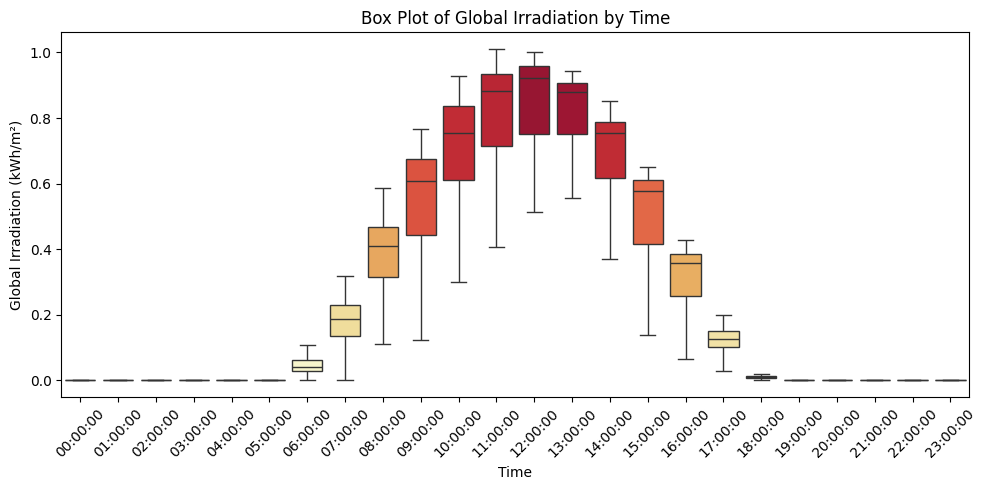

In [ ]:
norm = Normalize(vmin=df_SC_W1['Global Irradiation'].min(), vmax=df_SC_W1['Global Irradiation'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_SC_W1['Global Irradiation']))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_SC_W1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
plt.title('Box Plot of Global Irradiation by Time')
plt.xlabel('Time')
plt.ylabel('Global Irradiation (kWh/m²)')
plt.xticks(rotation=45)
plt.tight_layout()

<ipython-input-78-42243ad60ef8>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-78-42243ad60ef8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_SC_F1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
<ipython-input-78-42243ad60ef8>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=df_SC_F1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
<ipython-input-78-42243ad60ef8>:6: UserWarning: The palette list has more values (2184) than needed (24), which may not be intended.

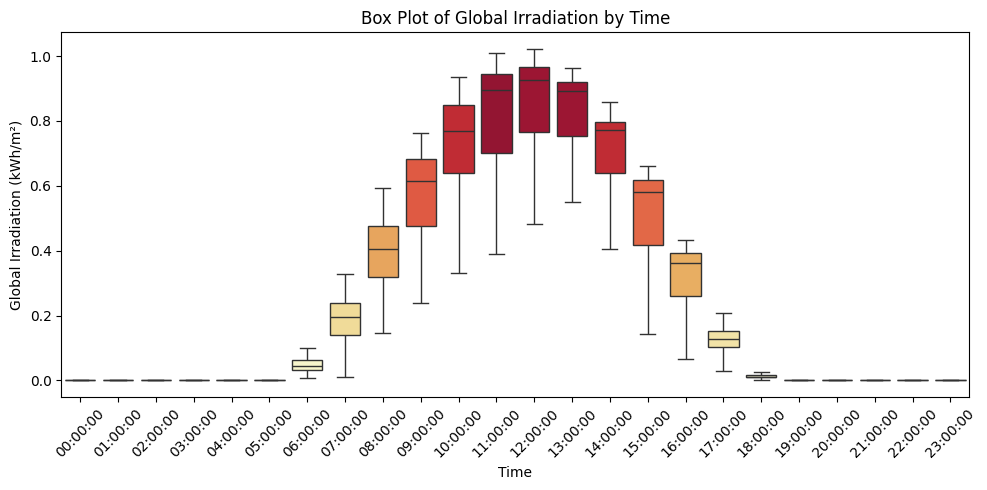

In [ ]:
norm = Normalize(vmin=df_SC_F1['Global Irradiation'].min(), vmax=df_SC_F1['Global Irradiation'].max())
cmap = cm.get_cmap('YlOrRd')
colors = cmap(norm(df_SC_F1['Global Irradiation']))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_SC_F1, x='Time', y='Global Irradiation', palette=colors, showfliers=False)
plt.title('Box Plot of Global Irradiation by Time')
plt.xlabel('Time')
plt.ylabel('Global Irradiation (kWh/m²)')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
df_SC_W1.head(5)

Plant            Datetime  Global Irradiation  Inverter Yield  \
0  Warehouse W1 2022-04-01 00:00:00                 0.0             0.0   
1  Warehouse W1 2022-04-01 01:00:00                 0.0             0.0   
2  Warehouse W1 2022-04-01 02:00:00                 0.0             0.0   
3  Warehouse W1 2022-04-01 03:00:00                 0.0             0.0   
4  Warehouse W1 2022-04-01 04:00:00                 0.0             0.0   

   Export Energy  Self Consumption  Humidity_mean  Temperature_mean  \
0            0.0               0.0      74.714286         30.942857   
1            0.0               0.0      74.857143         30.971429   
2            0.0               0.0      75.777778         30.933333   
3            0.0               0.0      76.437500         30.900000   
4            0.0               0.0      77.500000         30.862500   

        Date      Time  
0 2022-04-01  00:00:00  
1 2022-04-01  01:00:00  
2 2022-04-01  02:00:00  
3 2022-04-01  03:00:00  
4 2022-04-01  04:00:00

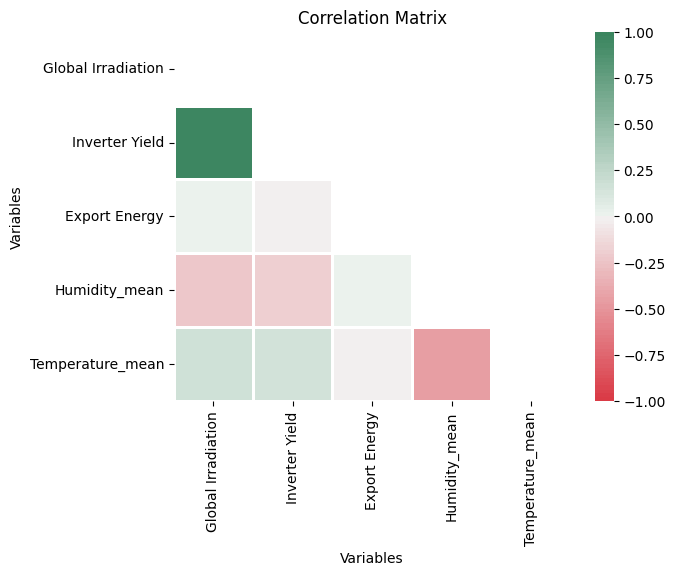

In [ ]:
df_SC_W1_corr = df_SC_W1[['Global Irradiation', 'Inverter Yield', 'Export Energy', 'Humidity_mean', 'Temperature_mean']]

mask = np.zeros_like(df_SC_W1_corr.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_SC_W1_corr.corr(), cmap=sns.diverging_palette(10, 145, n=100), vmin=-1, vmax=1, center=0, linewidths=1, mask=mask)
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

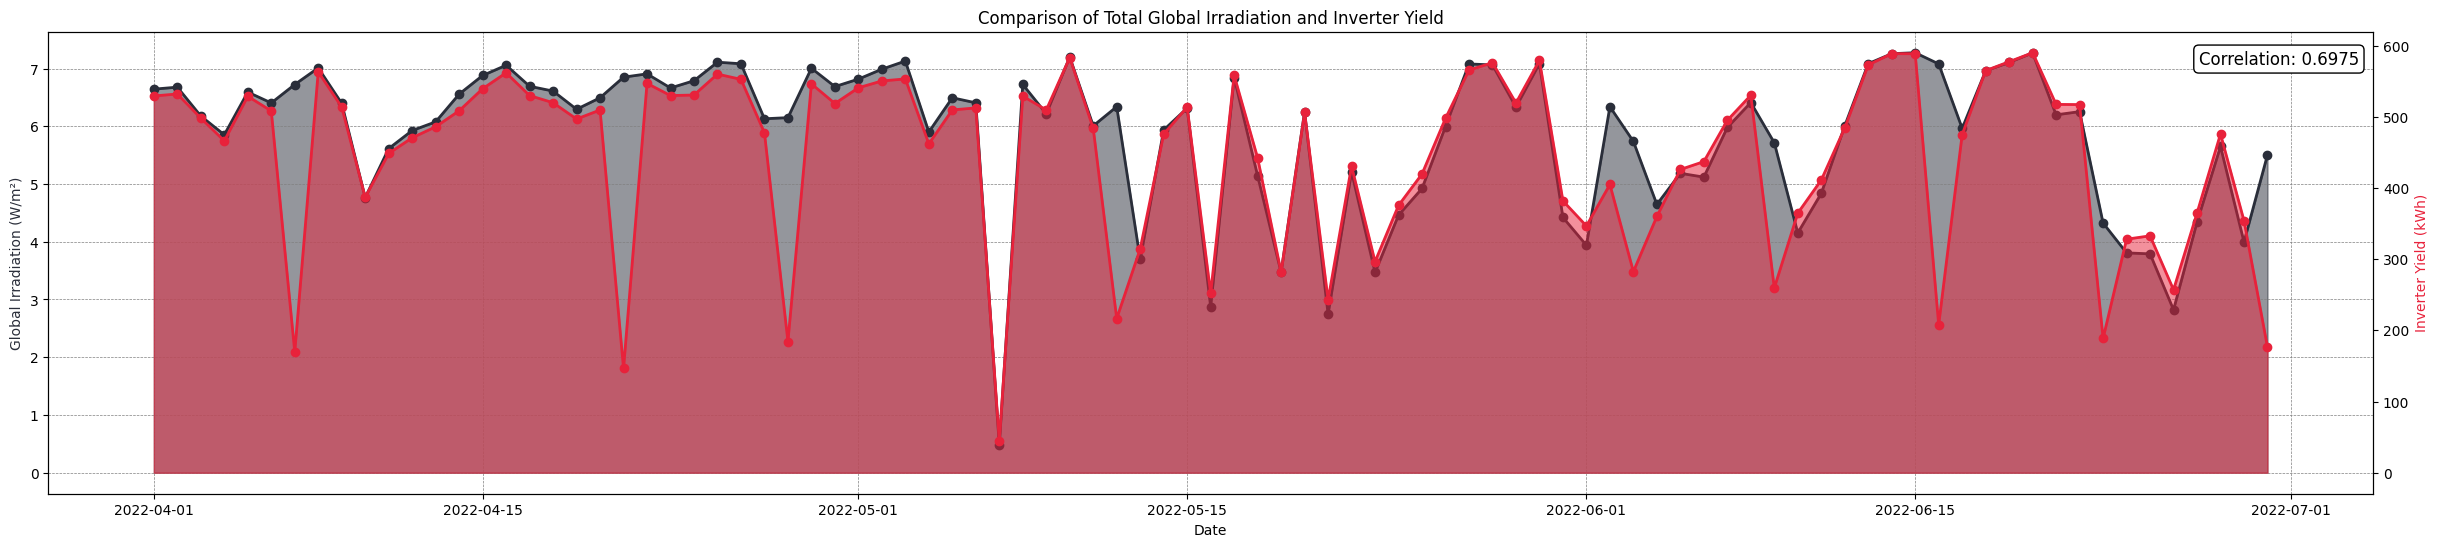

In [ ]:
grouped = df_SC_W1.groupby('Date').agg({'Global Irradiation': 'sum', 'Inverter Yield': 'sum'})
grouped = grouped.reset_index()

corr = grouped['Global Irradiation'].corr(grouped['Inverter Yield'])
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

fig, ax1 = plt.subplots(figsize=(30, 6))

color = '#2a2e3a'
ax1.set_xlabel('Date')
ax1.set_ylabel('Global Irradiation (W/m²)', color=color)
ax1.fill_between(grouped['Date'], grouped['Global Irradiation'],0 , color=color, alpha=0.5)
ax1.plot(grouped['Date'], grouped['Global Irradiation'], marker='o', linewidth=2, color=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

color = '#e8223b'
ax2 = ax1.twinx()
ax2.set_ylabel('Inverter Yield (kWh)', color=color)
ax2.fill_between(grouped['Date'], grouped['Inverter Yield'], 0, color=color, alpha=0.5)
ax2.plot(grouped['Date'], grouped['Inverter Yield'], marker='o', linewidth=2, color=color)

plt.title("Comparison of Total Global Irradiation and Inverter Yield")
plt.text(0.925, 0.93, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, fontsize=12, bbox=bbox_props)
plt.show()

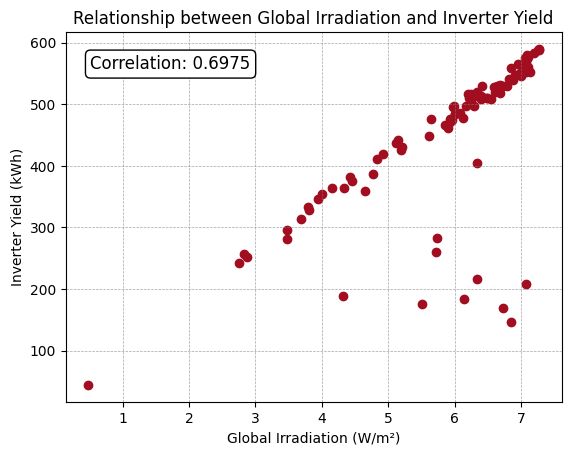

In [ ]:

corr = grouped['Global Irradiation'].corr(grouped['Inverter Yield'])
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)


sns.scatterplot(data=grouped, x='Global Irradiation', y='Inverter Yield')
plt.scatter(grouped['Global Irradiation'], grouped['Inverter Yield'], color="#a20e20")
plt.title('Relationship between Global Irradiation and Inverter Yield')
plt.xlabel('Global Irradiation (W/m²)')
plt.ylabel('Inverter Yield (kWh)')
plt.text(0.05, 0.9, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, fontsize=12, bbox=bbox_props)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.show()

# **Factory: F1**

In [ ]:
#
df_E_F1 = pd.read_excel(Environment_F1)
df_E_F1['Plant'] = df_E_F1['Device'].str[:10]
df_E_F1['Device'] = df_E_F1['Device'].str[11:]
df_E_F1 = df_E_F1[['Plant'] + [col for col in df_E_F1.columns if col != 'Plant']]

#
dfs = []
grouped_dfs = {device: data for device, data in df_E_F1.groupby('Device')}
for device, data in grouped_dfs.items():
    globals()[f"df_E_F1_{device}"] = data
    grouped = data.groupby(pd.Grouper(key='Datetime', freq='H'))
    df = grouped.agg({'Plant': ['first'], 'Device': ['first'], 'Area': ['first'], 'Humidity': ['mean'], 'Temperature': ['mean']})
    df.columns = ['Plant', 'Device', 'Area', 'Humidity_mean', 'Temperature_mean']
    df.reset_index(inplace=True)
    dfs.append(df)

#
df_E_F1 = pd.concat(dfs, ignore_index=True)
df_E_F1['Date'] = pd.to_datetime(df_E_F1['Datetime'].dt.date)
df_E_F1['Time'] = df_E_F1['Datetime'].dt.time
df_E_F1 = df_E_F1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          10920 non-null  datetime64[ns]
 1   Plant             10750 non-null  object        
 2   Device            10750 non-null  object        
 3   Area              10750 non-null  object        
 4   Humidity_mean     10750 non-null  float64       
 5   Temperature_mean  10750 non-null  float64       
 6   Date              10920 non-null  datetime64[ns]
 7   Time              10920 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 682.6+ KB


In [ ]:
#device_error = df_E_F1[df_E_F1.isnull().any(axis=1)]
#device_error = device_error[['Date', 'Time']].value_counts().sort_index().reset_index()
#device_error

In [ ]:
#df_E_F1[['Area', 'Device']].value_counts().sort_index().reset_index()

In [ ]:
#
device_type_1 = ['outdoor', 'roof', 'ambient', 'prod', 'dry']
device_type_2 = ['ambient', 'prod', 'dry']
device_type_3 = ['prod', 'dry']

#
def update_device_1(row):
    if row['Datetime'].date() in [pd.to_datetime('2022-05-01').date(), pd.to_datetime('2022-05-02').date()] and pd.isna(row['Device']):
        return device_type_1[row.name % len(device_type_1)]
    else:
        return row['Device']

#
def update_device_2(row):
    if row['Datetime'].date() in [pd.to_datetime('2022-06-02 10:00:00').date()] and pd.isna(row['Device']):
        return device_type_2[row.name % len(device_type_2)]
    elif row['Datetime'].date() in [pd.to_datetime('2022-06-02 11:00:00').date()] and pd.isna(row['Device']):
        return device_type_3[row.name % len(device_type_3)]
    else:
        return row['Device']

#
def update_area_F1(row):
    if row['Device'] in ['ambient', 'prod']:
        return 'Inside'
    elif row['Device'] in ['roof', 'outdoor']:
        return 'Outside'
    elif row['Device'] == 'dry':
        return 'Dry Room'
    else:
        return row['Area']

#
df_E_F1['Plant'] = 'Factory F1'
df_E_F1['Device'] = df_E_F1.apply(update_device_1, axis=1)
df_E_F1['Device'] = df_E_F1.apply(update_device_2, axis=1)
df_E_F1['Area'] = df_E_F1.apply(update_area_F1, axis=1)
df_E_F1['Humidity_mean'] = df_E_F1.groupby(['Device', 'Time'])['Humidity_mean'].transform(lambda x: x.fillna(x.median()))
df_E_F1['Temperature_mean'] = df_E_F1.groupby(['Device', 'Time'])['Temperature_mean'].transform(lambda x: x.fillna(x.median()))
df_E_F1 = df_E_F1.sort_values(['Device', 'Datetime']).reset_index(drop=True)
df_E_F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          10920 non-null  datetime64[ns]
 1   Plant             10920 non-null  object        
 2   Device            10920 non-null  object        
 3   Area              10920 non-null  object        
 4   Humidity_mean     10920 non-null  float64       
 5   Temperature_mean  10920 non-null  float64       
 6   Date              10920 non-null  datetime64[ns]
 7   Time              10920 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 682.6+ KB


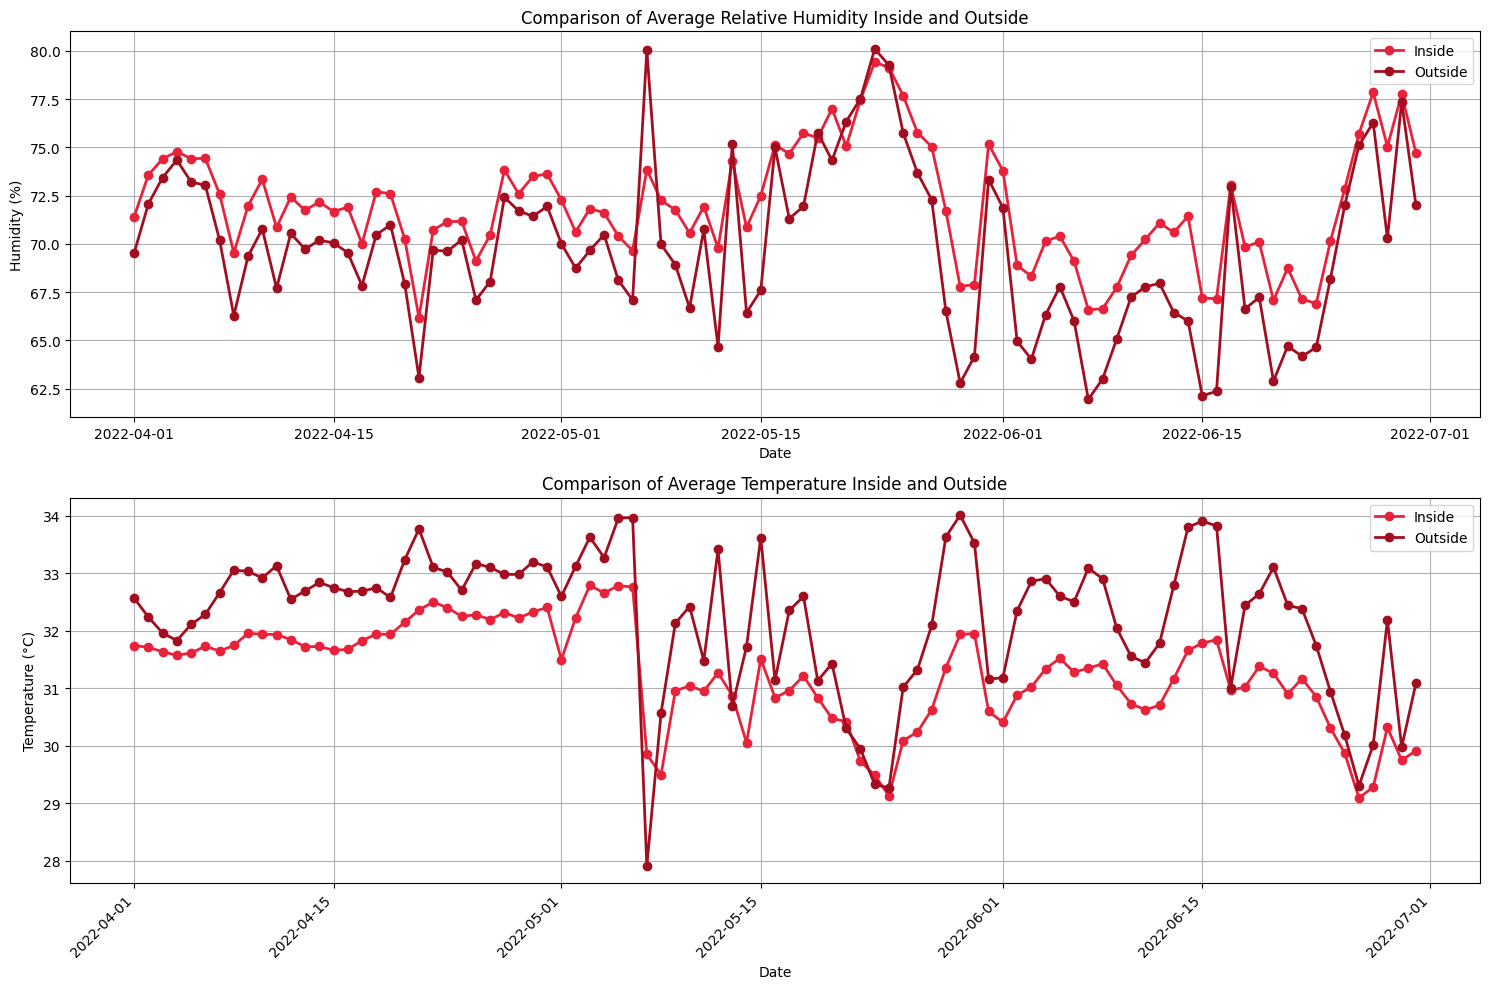

In [ ]:
grouped = df_E_F1[df_E_F1['Area'] != 'Dry Room']
grouped = grouped.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
#grouped = df_E_F1.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

colors = {'Inside': '#e8223b', 'Outside': '#a20e20', 'Dry Room': '#2a2e3a'}
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], label=area, marker='o', linewidth=2, color=colors[area])

ax1.set_title('Comparison of Average Relative Humidity Inside and Outside')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity (%)')
ax1.legend()
ax1.grid(True)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], label=area, marker='o', linewidth=2, color=colors[area])

ax2.set_title('Comparison of Average Temperature Inside and Outside')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

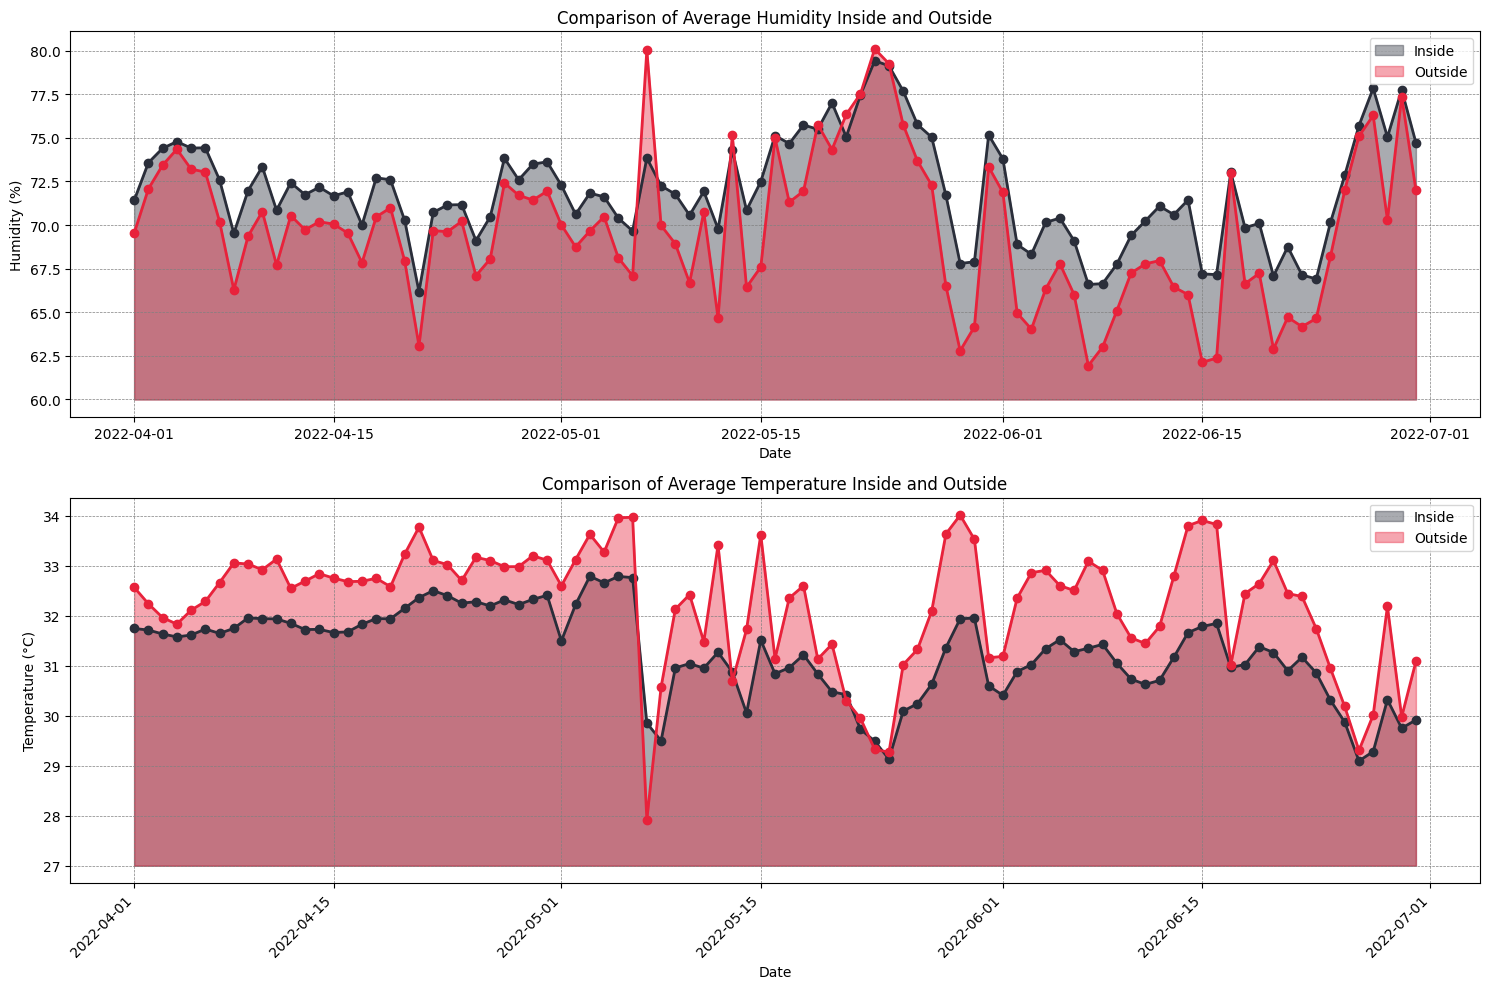

In [ ]:
grouped = df_E_F1[df_E_F1['Area'] != 'Dry Room']
grouped = grouped.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

colors = {'Inside': '#2a2e3a', 'Outside': '#e8223b'}
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.fill_between(area_data['Date'], 60, area_data['Humidity_mean'], label=area, alpha=0.4, color=colors[area])
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], marker='o', linewidth=2, color=colors[area])

ax1.set_title('Comparison of Average Humidity Inside and Outside')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity (%)')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.fill_between(area_data['Date'], 27, area_data['Temperature_mean'], label=area, alpha=0.4, color=colors[area])
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], marker='o', linewidth=2, color=colors[area])

ax2.set_title('Comparison of Average Temperature Inside and Outside')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

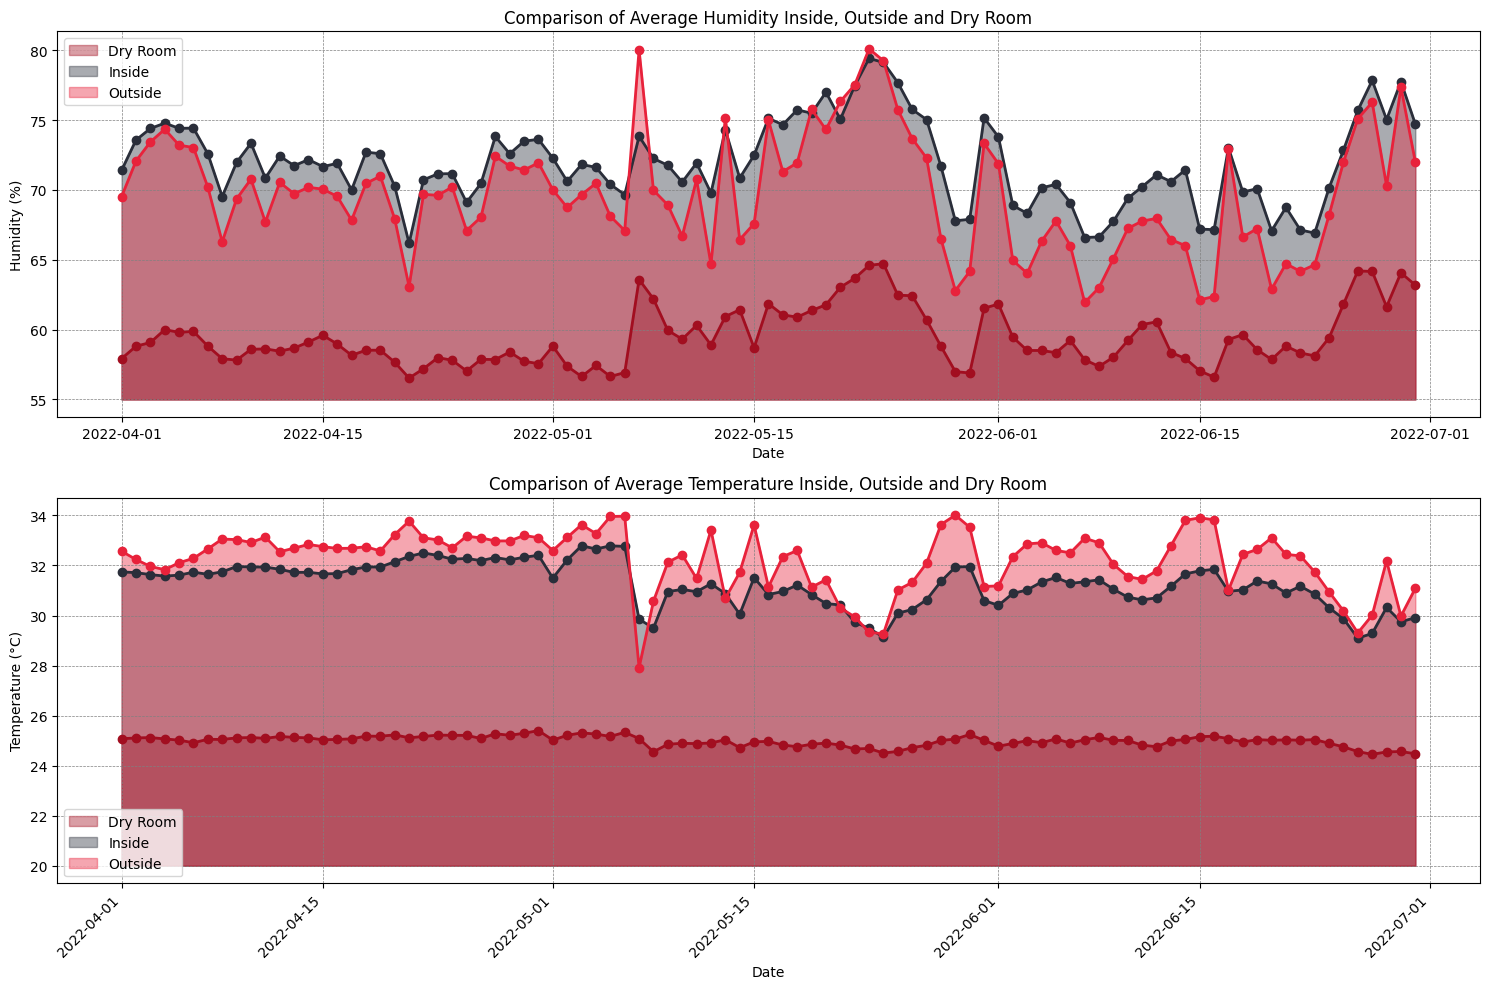

In [ ]:
grouped = df_E_F1.groupby(['Area', 'Date'])[['Humidity_mean', 'Temperature_mean']].mean()
grouped = grouped.reset_index()

colors = {'Inside': '#2a2e3a', 'Outside': '#e8223b', 'Dry Room': '#a20e20'}
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax1.fill_between(area_data['Date'], 55, area_data['Humidity_mean'], label=area, alpha=0.4, color=colors[area])
    ax1.plot(area_data['Date'], area_data['Humidity_mean'], marker='o', linewidth=2, color=colors[area])

ax1.set_title('Comparison of Average Humidity Inside, Outside and Dry Room')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity (%)')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

for area in grouped['Area'].unique():
    area_data = grouped[grouped['Area'] == area]
    ax2.fill_between(area_data['Date'], 20, area_data['Temperature_mean'], label=area, alpha=0.4, color=colors[area])
    ax2.plot(area_data['Date'], area_data['Temperature_mean'], marker='o', linewidth=2, color=colors[area])

ax2.set_title('Comparison of Average Temperature Inside, Outside and Dry Room')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#
df_E_F1_Outside = df_E_F1[df_E_W1['Area'] == 'Outside']
df_E_F1_Outside = df_E_F1_Outside[['Datetime', 'Humidity_mean', 'Temperature_mean']].reset_index(drop=True)

# Create dataset for Solar Consumption of Factory 1 (F1)
df_SC_F1 = pd.read_excel(Solar_Consumption_F1)
df_SC_F1 = pd.merge(df_SC_F1, df_E_F1_Outside, on='Datetime', how='outer')
df_SC_F1['Date'] = pd.to_datetime(df_SC_F1['Datetime'].dt.date)
df_SC_F1['Time'] = df_SC_F1['Datetime'].dt.time

df_SC_F1['Plant'] = 'Factory F1'
df_SC_F1['Global Irradiation'] = df_SC_F1.apply(GlobalIrradiation_MissingValue, axis=1)
df_SC_F1['Inverter Yield'] = df_SC_F1.apply(InverterYield_MissingValue, axis=1)
df_SC_F1['Self Consumption'] = df_SC_F1.apply(SelfConsumption_MissingValue, axis=1)
df_SC_F1['Global Irradiation'] = df_SC_F1.groupby('Time')['Global Irradiation'].transform(lambda x: x.fillna(x.median()))
df_SC_F1['Inverter Yield'] = df_SC_F1.groupby('Time')['Inverter Yield'].transform(lambda x: x.fillna(x.median()))
df_SC_F1['Self Consumption'] = df_SC_F1.groupby('Time')['Self Consumption'].transform(lambda x: x.fillna(x.median()))
df_SC_F1['Export Energy'] = df_SC_F1.apply(ExportEnergy_MissingValue, axis=1)
df_SC_F1 = df_SC_F1.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC_F1.info()

<ipython-input-27-82a7a99ad04b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_E_F1_Outside = df_E_F1[df_E_W1['Area'] == 'Outside']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               2184 non-null   object        
 1   Datetime            2184 non-null   datetime64[ns]
 2   Global Irradiation  2184 non-null   float64       
 3   Inverter Yield      2184 non-null   float64       
 4   Export Energy       2184 non-null   float64       
 5   Self Consumption    2184 non-null   float64       
 6   Humidity_mean       2184 non-null   float64       
 7   Temperature_mean    2184 non-null   float64       
 8   Date                2184 non-null   datetime64[ns]
 9   Time                2184 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 170.8+ KB


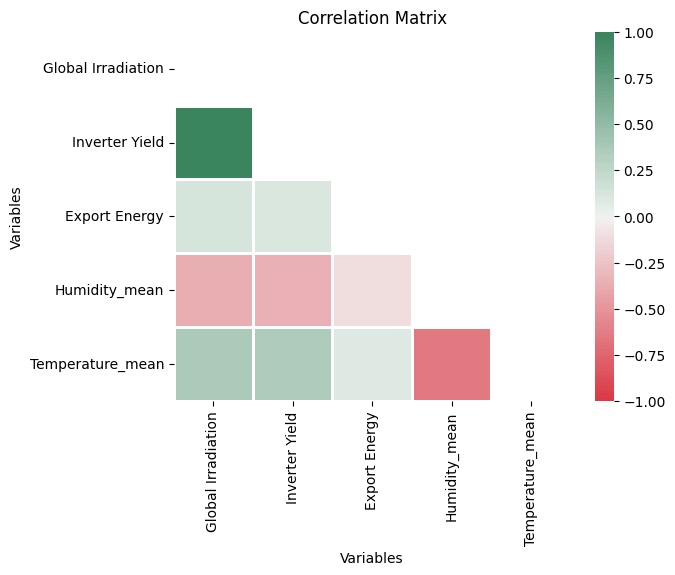

In [ ]:
df_SC_F1_corr = df_SC_F1[['Global Irradiation', 'Inverter Yield', 'Export Energy', 'Humidity_mean', 'Temperature_mean']]

mask = np.zeros_like(df_SC_F1_corr.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_SC_F1_corr.corr(), cmap=sns.diverging_palette(10, 145, n=100), vmin=-1, vmax=1, center=0, linewidths=1, mask=mask)
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

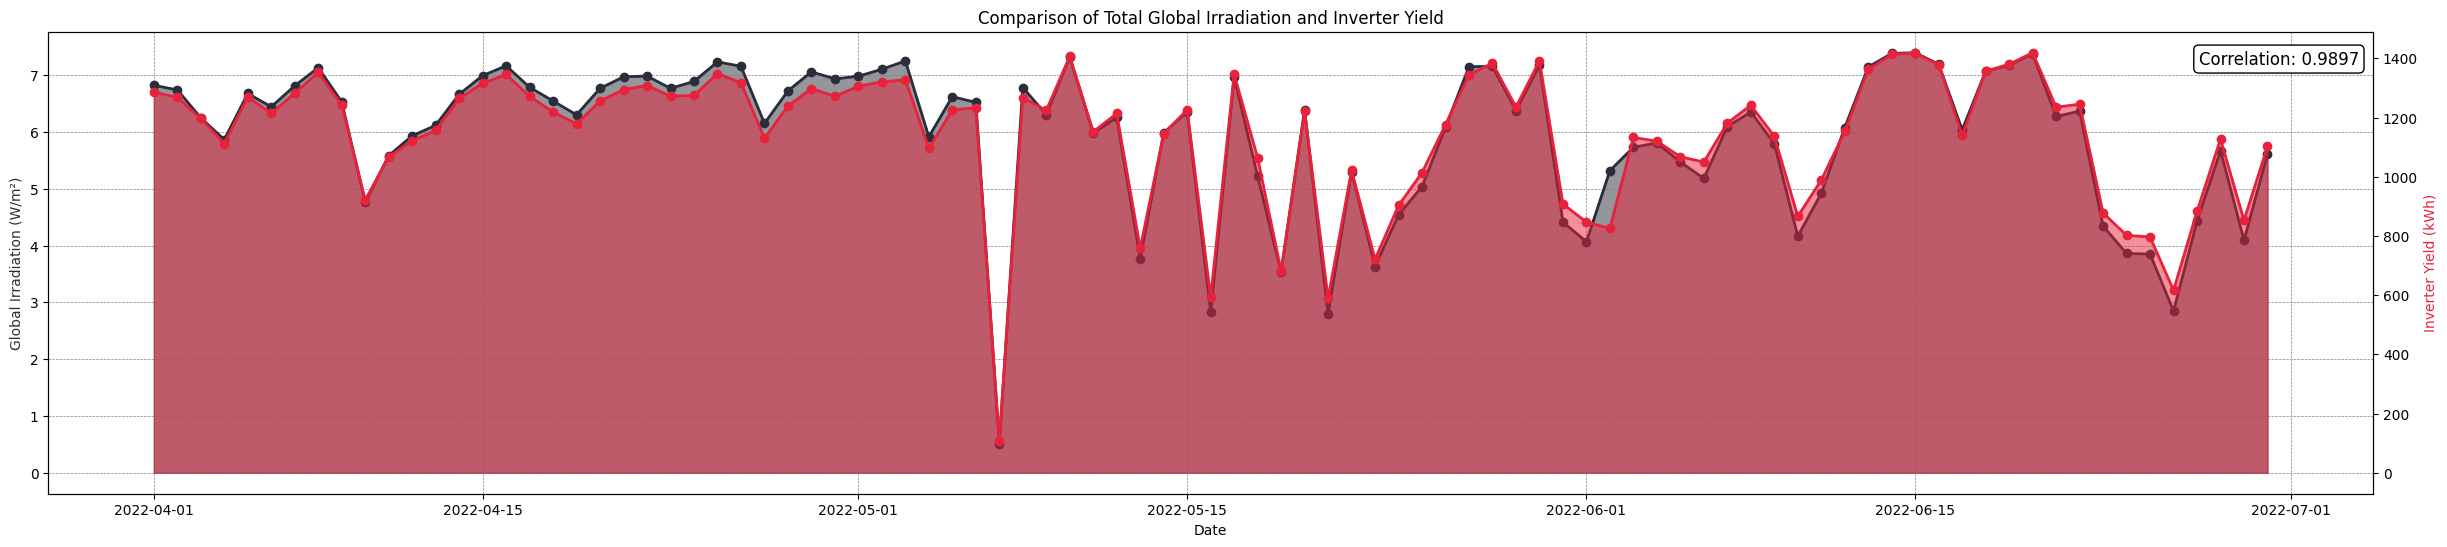

In [ ]:
grouped = df_SC_F1.groupby('Date').agg({'Global Irradiation': 'sum', 'Inverter Yield': 'sum', 'Humidity_mean': 'mean', 'Temperature_mean': 'mean'})
grouped = grouped.reset_index()

corr = grouped['Global Irradiation'].corr(grouped['Inverter Yield'])
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

fig, ax1 = plt.subplots(figsize=(30, 6))

color = '#2a2e3a'
ax1.set_xlabel('Date')
ax1.set_ylabel('Global Irradiation (W/m²)', color=color)
ax1.fill_between(grouped['Date'], grouped['Global Irradiation'],0 , color=color, alpha=0.5)
ax1.plot(grouped['Date'], grouped['Global Irradiation'], marker='o', linewidth=2, color=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

color = '#e8223b'
ax2 = ax1.twinx()
ax2.set_ylabel('Inverter Yield (kWh)', color=color)
ax2.fill_between(grouped['Date'], grouped['Inverter Yield'], 0, color=color, alpha=0.5)
ax2.plot(grouped['Date'], grouped['Inverter Yield'], marker='o', linewidth=2, color=color)

plt.title("Comparison of Total Global Irradiation and Inverter Yield")
plt.text(0.925, 0.93, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, fontsize=12, bbox=bbox_props)
plt.show()

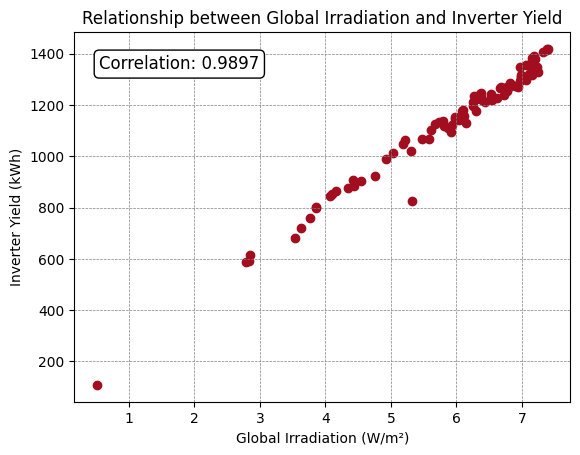

In [ ]:

corr = grouped['Global Irradiation'].corr(grouped['Inverter Yield'])
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)


sns.scatterplot(data=grouped, x='Global Irradiation', y='Inverter Yield')
plt.scatter(grouped['Global Irradiation'], grouped['Inverter Yield'], color="#a20e20")
plt.title('Relationship between Global Irradiation and Inverter Yield')
plt.xlabel('Global Irradiation (W/m²)')
plt.ylabel('Inverter Yield (kWh)')
plt.text(0.05, 0.9, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, fontsize=12, bbox=bbox_props)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)
plt.show()

<Figure size 640x480 with 0 Axes>

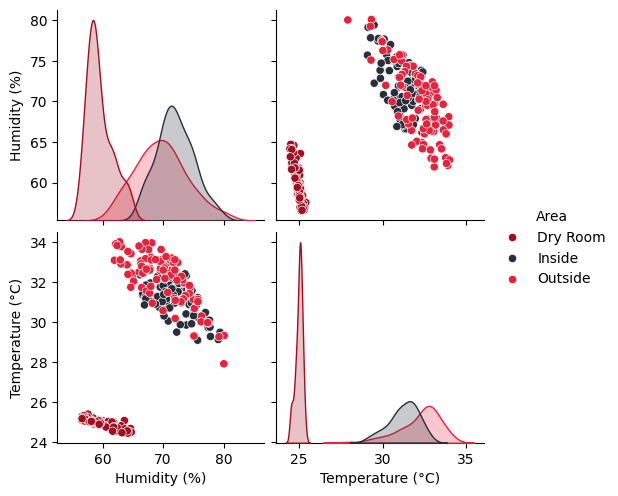

In [ ]:
grouped = df_E_F1.groupby(['Area', 'Date']).agg({'Humidity_mean': 'mean', 'Temperature_mean': 'mean'})
gruuped = grouped.rename(columns={'Humidity_mean': 'Humidity (%)', 'Temperature_mean': 'Temperature (°C)'}, inplace=True)
grouped = grouped.reset_index()

To_Plot = ['Area', 'Humidity (%)', 'Temperature (°C)']
plt.figure()

pal = {'Inside': '#2a2e3a', 'Outside': '#e8223b', 'Dry Room': '#a20e20'}
sns.pairplot(grouped[To_Plot], hue= 'Area', palette=pal)
plt.show()

# **Determine On-Peak and Off-Peak Period**

In [ ]:
#
Peak_Calendar = pd.read_excel(Peak_Calendar)

#
df_SC = pd.concat([df_SC_W1, df_SC_F1], axis=0)
df_E = pd.concat([df_E_W1, df_E_F1], axis=0)

#
df_SC = pd.merge(df_SC, Peak_Calendar, on='Datetime', how='inner')
df_SC = df_SC.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC.head(10)

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

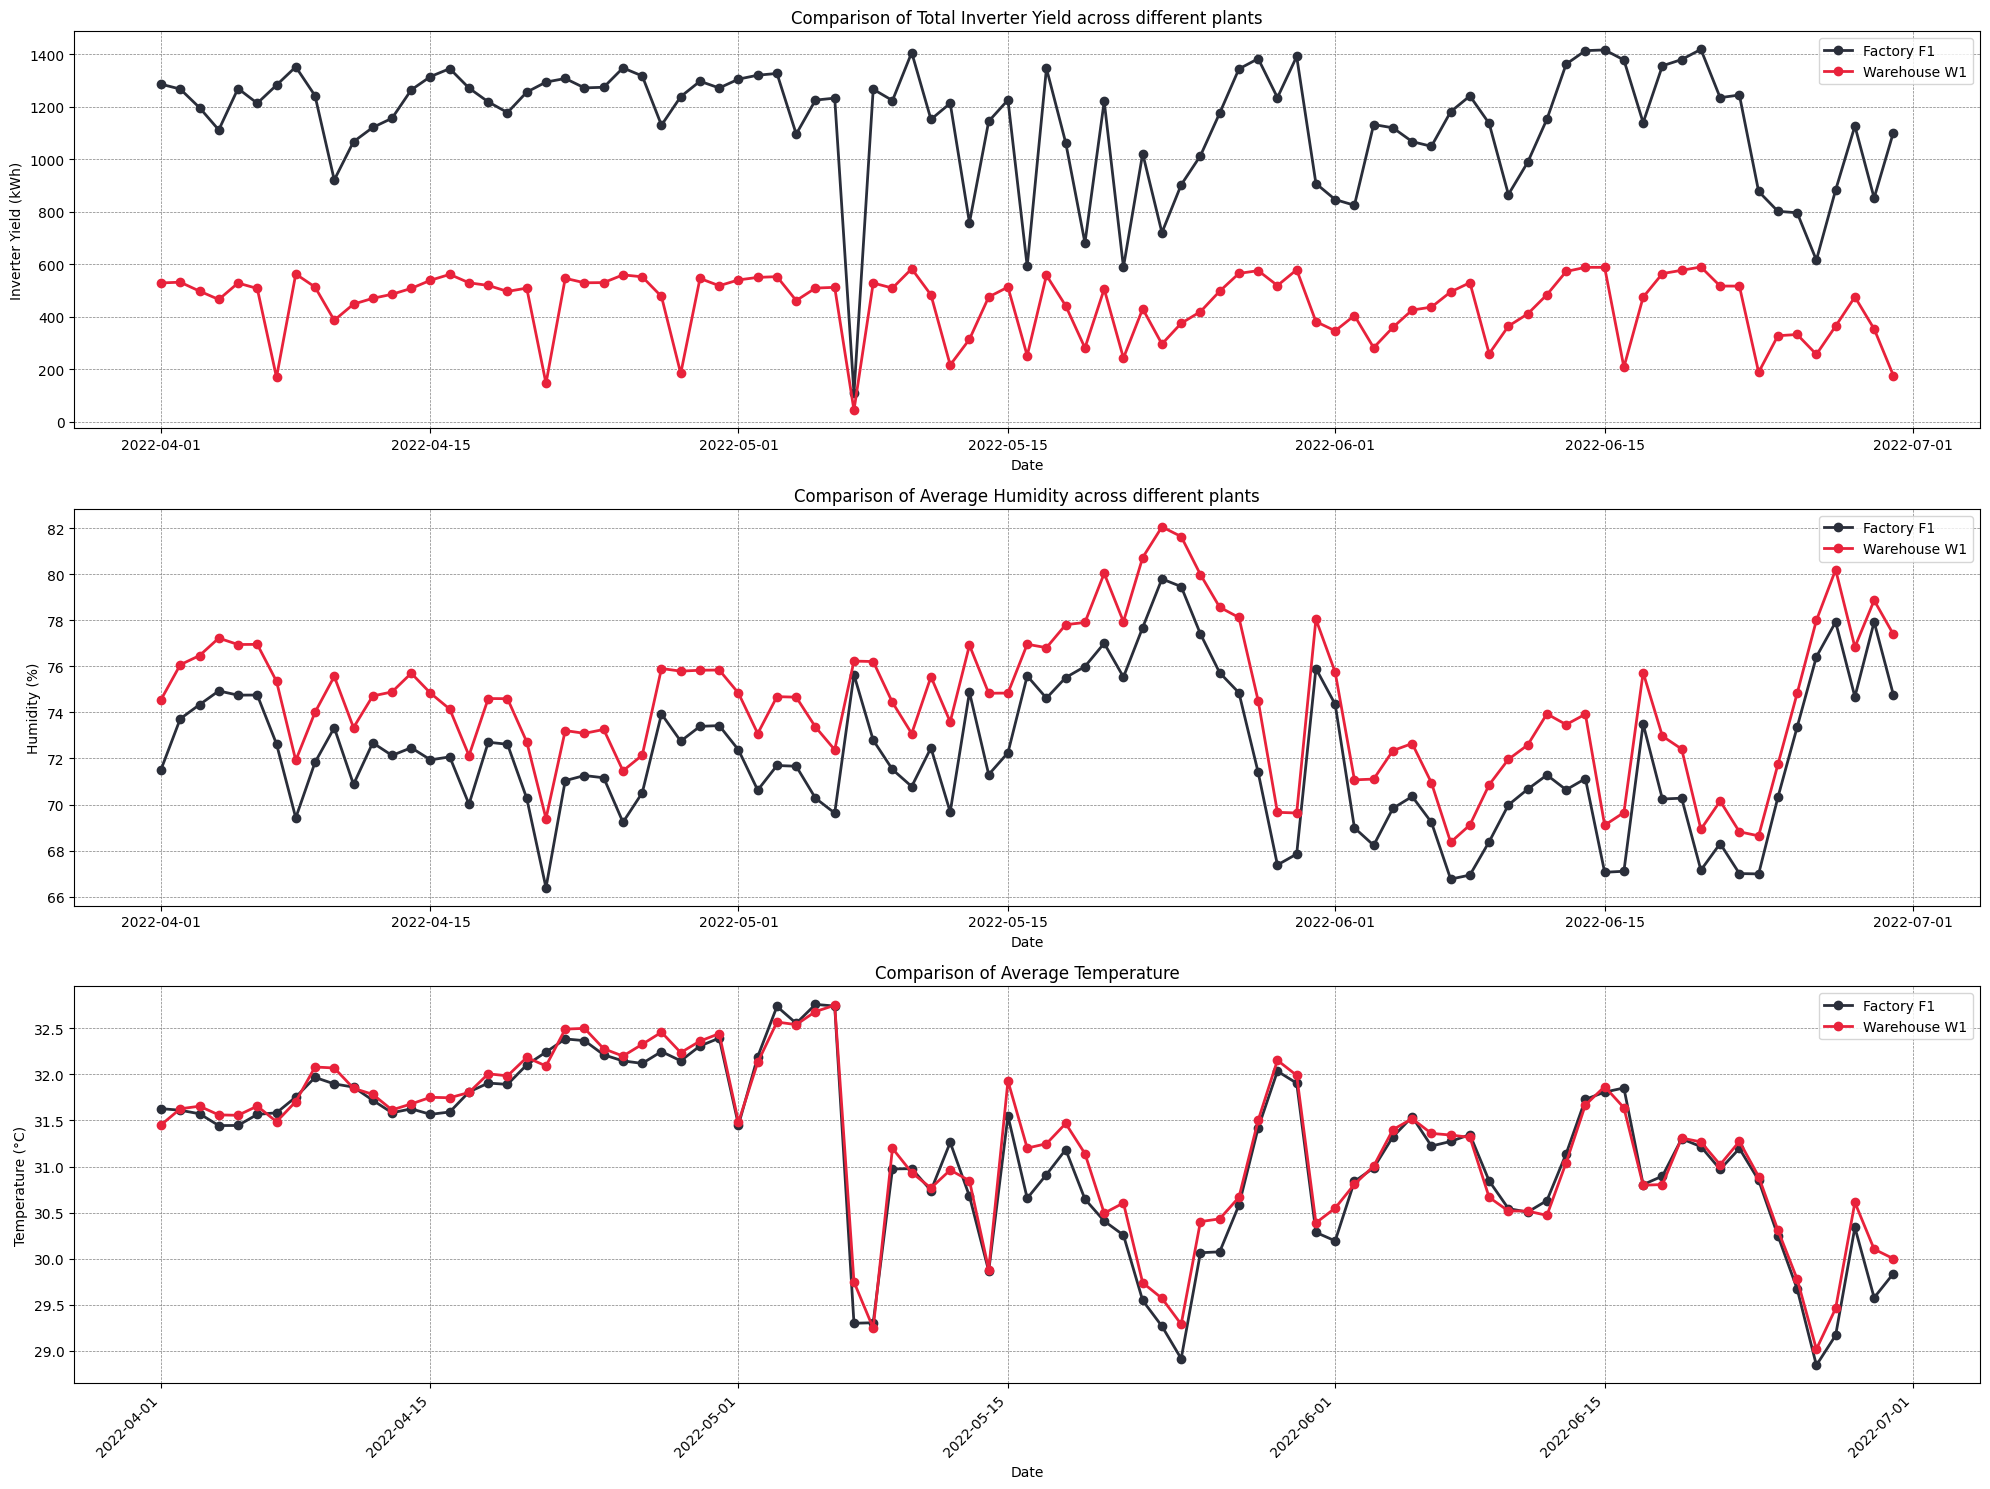

In [ ]:
grouped = df_SC.groupby(['Plant','Date']).agg({'Global Irradiation': 'sum', 'Inverter Yield': 'sum', 'Humidity_mean': 'mean', 'Temperature_mean': 'mean'})
grouped = grouped.reset_index()

colors = {'Factory F1': '#2a2e3a', 'Warehouse W1': '#e8223b'}
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax1.plot(plant_data['Date'], plant_data['Inverter Yield'], label=plant, marker='o', linewidth=2, color=colors[plant])

ax1.set_title('Comparison of Total Inverter Yield across different plants')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inverter Yield (kWh)')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax2.plot(plant_data['Date'], plant_data['Humidity_mean'], label=plant, marker='o', linewidth=2, color=colors[plant])

ax2.set_title('Comparison of Average Humidity across different plants')
ax2.set_xlabel('Date')
ax2.set_ylabel('Humidity (%)')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax3.plot(plant_data['Date'], plant_data['Temperature_mean'], label=plant, marker='o', linewidth=2, color=colors[plant])

ax3.set_title('Comparison of Average Temperature')
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature (°C)')
ax3.legend()
ax3.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

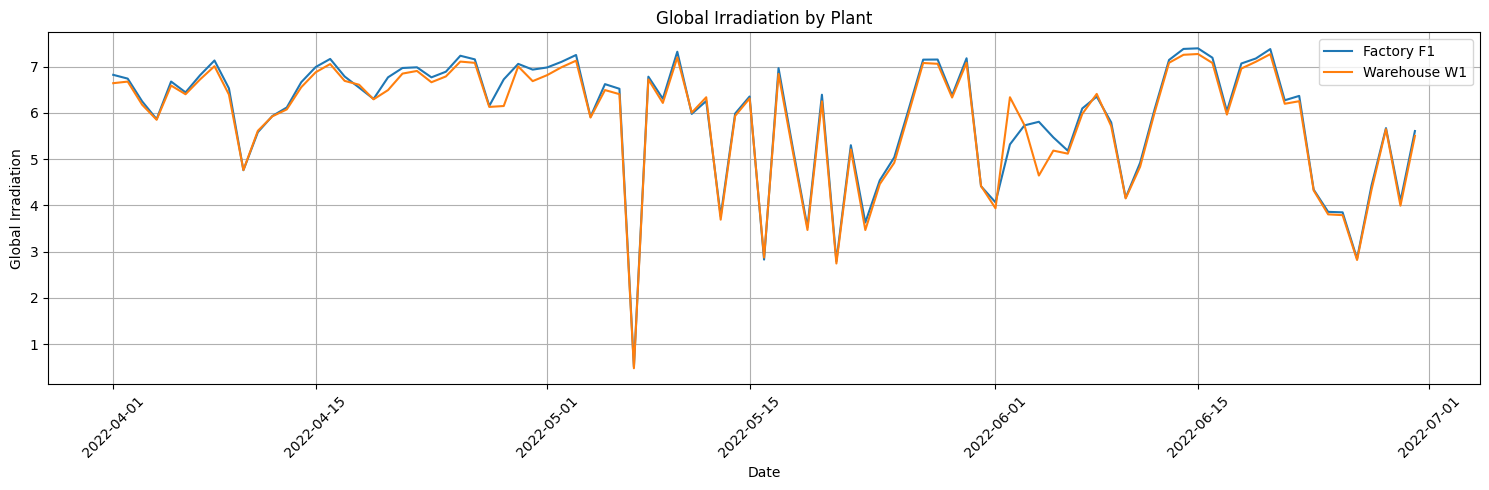

In [ ]:
grouped = df_SC.groupby(['Plant', 'Date'])['Global Irradiation'].sum()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Global Irradiation'], label=plant)

plt.title('Global Irradiation by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Global Irradiation')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

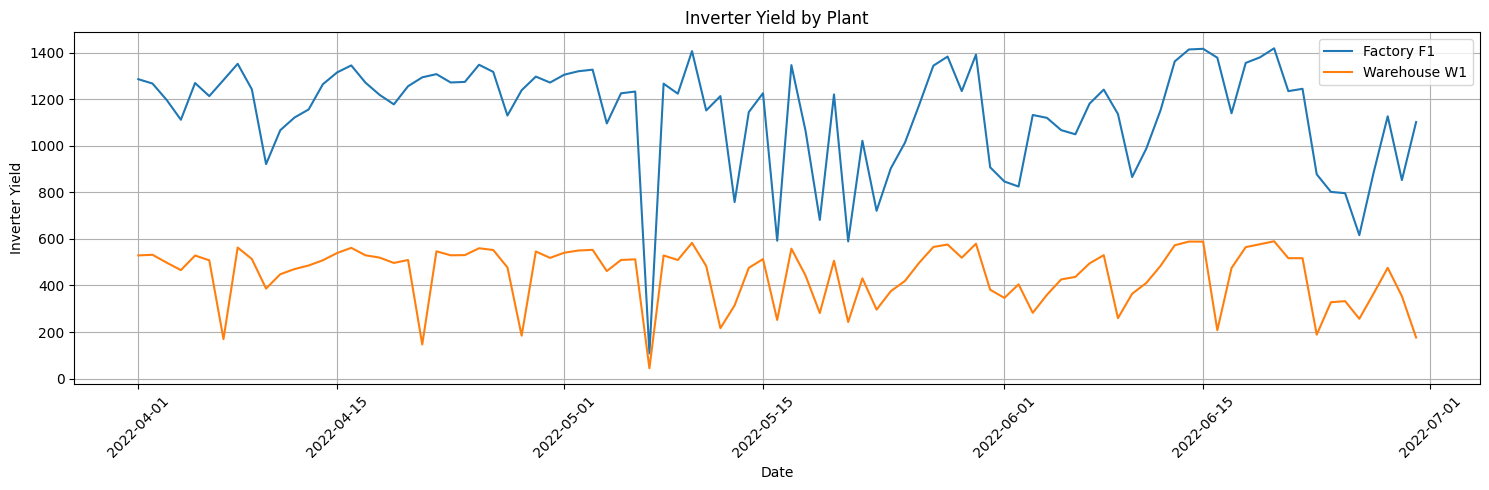

In [ ]:
grouped = df_SC.groupby(['Plant', 'Date'])['Inverter Yield'].sum()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Inverter Yield'], label=plant)

plt.title('Inverter Yield by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Inverter Yield')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

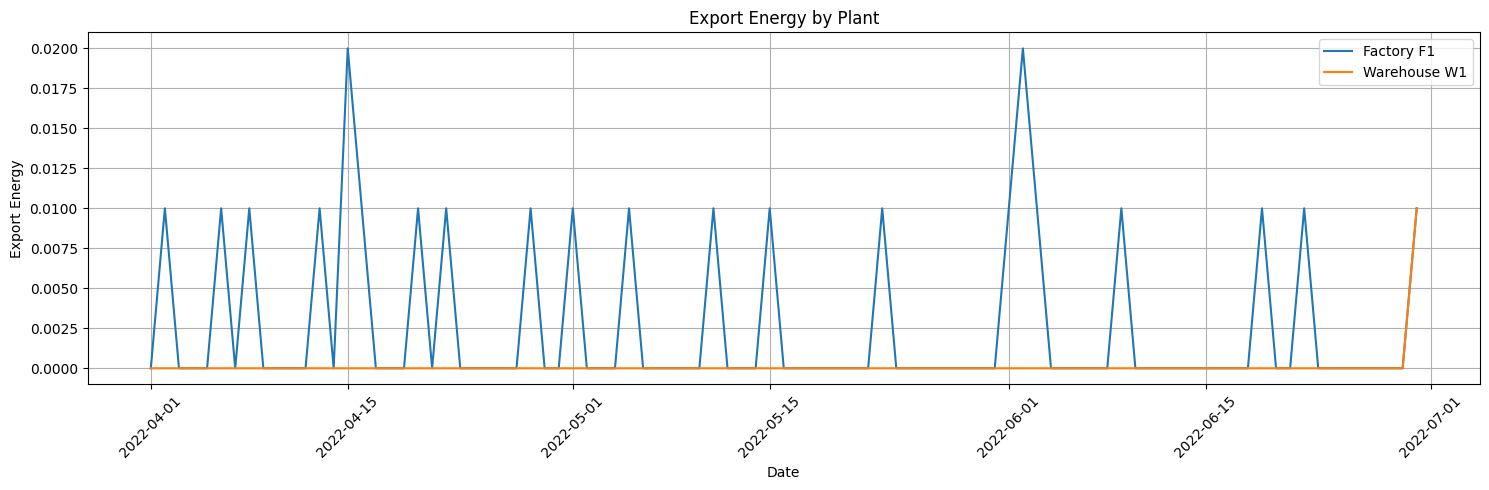

In [ ]:
grouped = df_SC.groupby(['Plant', 'Date'])['Export Energy'].sum()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Export Energy'], label=plant)

plt.title('Export Energy by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Export Energy')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

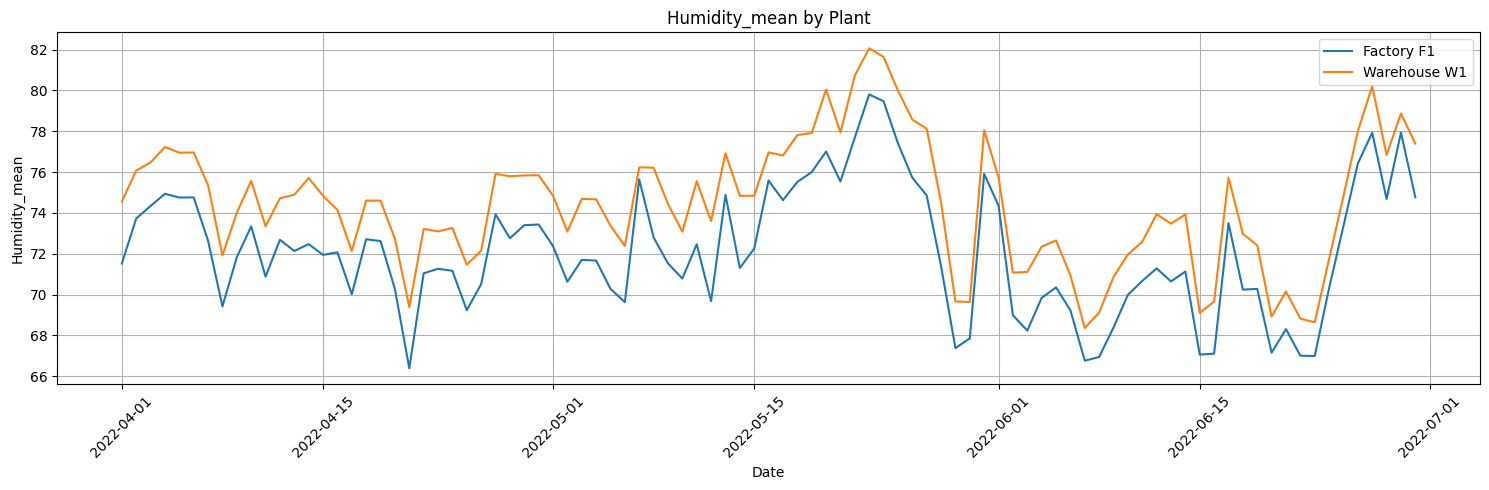

In [ ]:
grouped = df_SC.groupby(['Plant', 'Date'])['Humidity_mean'].mean()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Humidity_mean'], label=plant)

plt.title('Humidity_mean by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Humidity_mean')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

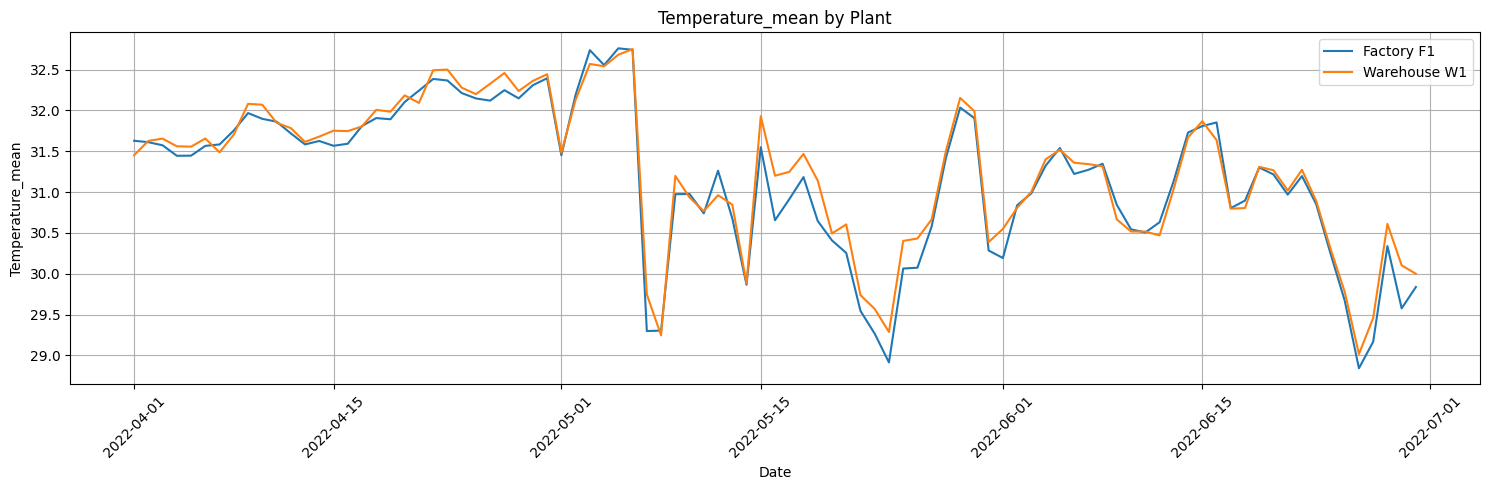

In [ ]:
grouped = df_SC.groupby(['Plant', 'Date'])['Temperature_mean'].mean()
grouped = grouped.reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

for plant in grouped['Plant'].unique():
    plant_data = grouped[grouped['Plant'] == plant]
    ax.plot(plant_data['Date'], plant_data['Temperature_mean'], label=plant)

plt.title('Temperature_mean by Plant')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature_mean')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

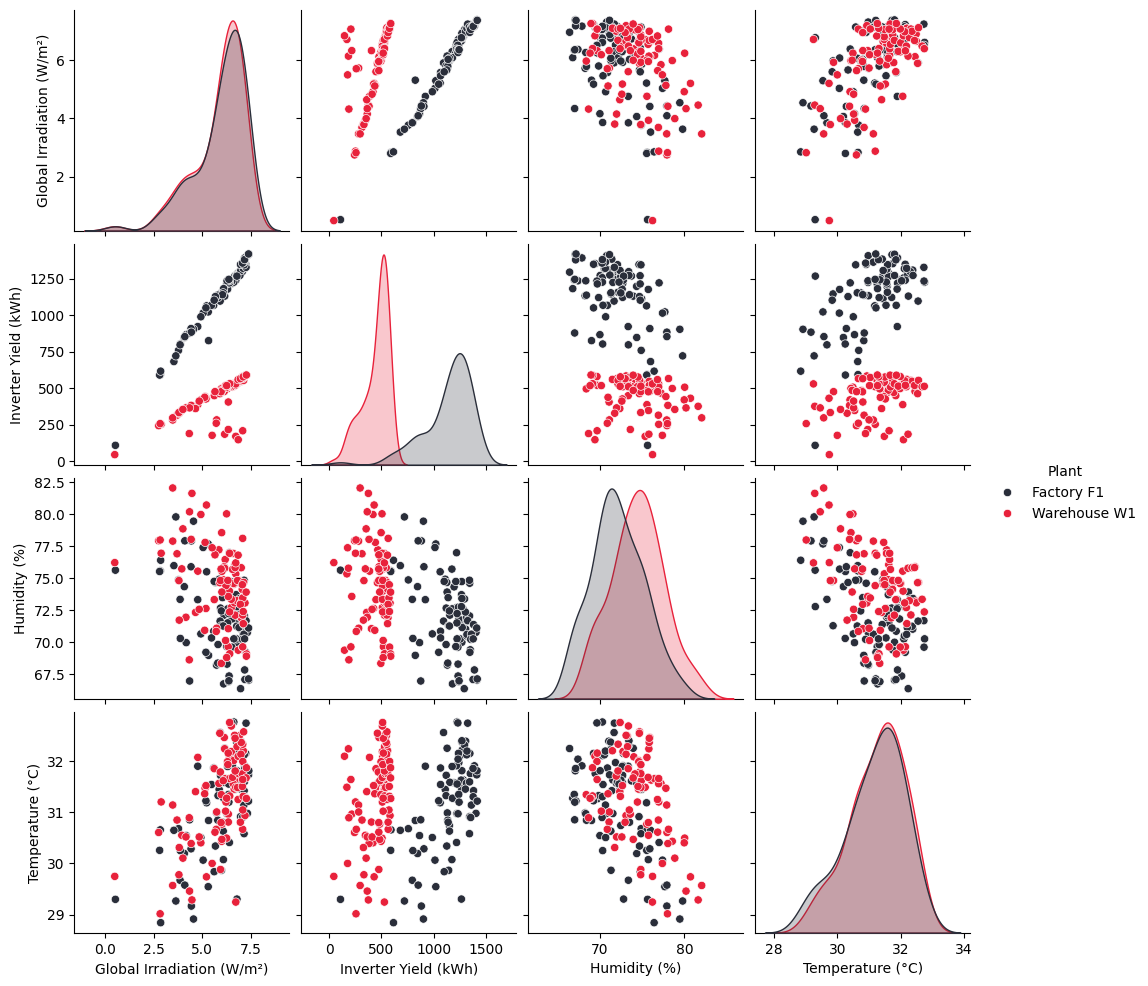

In [ ]:
grouped = df_SC.groupby(['Plant','Date']).agg({'Global Irradiation': 'sum', 'Inverter Yield': 'sum', 'Humidity_mean': 'mean', 'Temperature_mean': 'mean'})
gruuped = grouped.rename(columns={'Global Irradiation': 'Global Irradiation (W/m²)',
                                  'Inverter Yield': 'Inverter Yield (kWh)',
                                  'Humidity_mean': 'Humidity (%)',
                                  'Temperature_mean': 'Temperature (°C)'}, inplace=True)
grouped = grouped.reset_index()

To_Plot = ['Plant', 'Global Irradiation (W/m²)', 'Inverter Yield (kWh)', 'Humidity (%)', 'Temperature (°C)']
plt.figure()

pal = {'Factory F1': '#2a2e3a', 'Warehouse W1': '#e8223b'}
sns.pairplot(grouped[To_Plot], hue= 'Plant', palette=pal)
plt.show()

In [ ]:
df_SC

Plant            Datetime  Global Irradiation  Inverter Yield  \
0       Factory F1 2022-04-01 00:00:00                 0.0             0.0   
1       Factory F1 2022-04-01 01:00:00                 0.0             0.0   
2       Factory F1 2022-04-01 02:00:00                 0.0             0.0   
3       Factory F1 2022-04-01 03:00:00                 0.0             0.0   
4       Factory F1 2022-04-01 04:00:00                 0.0             0.0   
...            ...                 ...                 ...             ...   
4359  Warehouse W1 2022-06-30 19:00:00                 0.0             0.0   
4360  Warehouse W1 2022-06-30 20:00:00                 0.0             0.0   
4361  Warehouse W1 2022-06-30 21:00:00                 0.0             0.0   
4362  Warehouse W1 2022-06-30 22:00:00                 0.0             0.0   
4363  Warehouse W1 2022-06-30 23:00:00                 0.0             0.0   

      Export Energy  Self Consumption  Humidity_mean  Temperature_mean  \
0               0.0               0.0      72.090909         30.963636   
1               0.0               0.0      72.681818         30.863636   
2               0.0               0.0      73.666667         30.758333   
3               0.0               0.0      74.590909         30.709091   
4               0.0               0.0      75.583333         30.641667   
...             ...               ...            ...               ...   
4359            0.0               0.0      75.687500         30.412500   
4360            0.0               0.0      75.125000         29.537500   
4361            0.0               0.0      76.111111         29.288889   
4362            0.0               0.0      77.285714         29.271429   
4363            0.0               0.0      78.142857         29.342857   

           Date      Time Time_Period    Month  
0    2022-04-01  00:00:00    Off-Peak  2022-04  
1    2022-04-01  01:00:00    Off-Peak  2022-04  
2    2022-04-01  02:00:00    Off-Peak  2022-04  
3    2022-04-01  03:00:00    Off-Peak  2022-04  
4    2022-04-01  04:00:00    Off-Peak  2022-04  
...         ...       ...         ...      ...  
4359 2022-06-30  19:00:00     On-Peak  2022-06  
4360 2022-06-30  20:00:00     On-Peak  2022-06  
4361 2022-06-30  21:00:00     On-Peak  2022-06  
4362 2022-06-30  22:00:00    Off-Peak  2022-06  
4363 2022-06-30  23:00:00    Off-Peak  2022-06  

[4364 rows x 12 columns]

In [ ]:
df_SC[df_SC['Plant'] == 'Warehouse W1'].describe()

Datetime  Global Irradiation  Inverter Yield  \
count                           2182         2182.000000     2182.000000   
mean   2022-05-16 11:03:37.781851648            0.244521       18.587352   
min              2022-04-01 00:00:00            0.000000        0.000000   
25%              2022-04-23 17:15:00            0.000000        0.000000   
50%              2022-05-16 10:30:00            0.017361        1.370000   
75%              2022-06-08 05:45:00            0.482222       34.717500   
max              2022-06-30 23:00:00            1.010833       79.820000   
std                              NaN            0.325461       25.243246   

       Export Energy  Self Consumption  Humidity_mean  Temperature_mean  \
count    2182.000000       2182.000000    2182.000000       2182.000000   
mean        0.000005         18.587296      74.443027         31.262329   
min         0.000000          0.000000      62.000000         27.600000   
25%         0.000000          0.000000      71.705556         30.670357   
50%         0.000000          1.370000      74.937500         31.425714   
75%         0.000000         34.717500      77.050000         31.983333   
max         0.010000         79.820000      86.375000         33.350000   
std         0.000214         25.243285       4.079033          1.035661   

                                Date  
count                           2182  
mean   2022-05-15 23:34:15.728689408  
min              2022-04-01 00:00:00  
25%              2022-04-23 00:00:00  
50%              2022-05-16 00:00:00  
75%              2022-06-08 00:00:00  
max              2022-06-30 00:00:00  
std                              NaN

In [ ]:
df_SC[df_SC['Plant'] == 'Factory F1'].describe()

Datetime  Global Irradiation  Inverter Yield  \
count                           2182         2182.000000     2182.000000   
mean   2022-05-16 11:03:37.781851648            0.248023       47.529687   
min              2022-04-01 00:00:00            0.000000        0.000000   
25%              2022-04-23 17:15:00            0.000000        0.000000   
50%              2022-05-16 10:30:00            0.020833        3.420000   
75%              2022-06-08 05:45:00            0.490556       98.992500   
max              2022-06-30 23:00:00            1.022222      188.200000   
std                              NaN            0.328729       62.689893   

       Export Energy  Self Consumption  Humidity_mean  Temperature_mean  \
count    2182.000000       2182.000000    2182.000000       2182.000000   
mean        0.000105         47.529505      72.102759         31.171292   
min         0.000000          0.000000      56.000000         27.187500   
25%         0.000000          0.000000      68.853409         30.391667   
50%         0.000000          3.420000      72.724747         31.243561   
75%         0.000000         98.985000      75.208333         32.029895   
max         0.020000        188.200000      84.545455         34.169231   
std         0.001108         62.689833       4.567859          1.248607   

                                Date  
count                           2182  
mean   2022-05-15 23:34:15.728689408  
min              2022-04-01 00:00:00  
25%              2022-04-23 00:00:00  
50%              2022-05-16 00:00:00  
75%              2022-06-08 00:00:00  
max              2022-06-30 00:00:00  
std                              NaN

In [ ]:
df_SC['Month'] = df_SC['Date'].dt.to_period('M')

# Group By ตาม Plant และ Month แล้วทำการ Sum
grouped = df_SC.groupby(['Plant', 'Month'])[['Global Irradiation', 'Inverter Yield', 'Export Energy', 'Self Consumption']].sum().reset_index() # Remove drop=True to keep 'Plant' column
grouped = grouped.sort_values(['Plant', 'Month'])
grouped

Plant    Month  Global Irradiation  Inverter Yield  Export Energy  \
0    Factory F1  2022-04          197.784722    37093.775833           0.10   
1    Factory F1  2022-05          174.285833    33602.587778           0.05   
2    Factory F1  2022-06          169.116667    33013.414167           0.08   
3  Warehouse W1  2022-04          194.804444    14357.560000           0.00   
4  Warehouse W1  2022-05          172.001111    13722.350000           0.00   
5  Warehouse W1  2022-06          166.739444    12477.692778           0.01   

   Self Consumption  
0          37093.67  
1          33602.51  
2          33013.20  
3          14357.56  
4          13722.35  
5          12477.57

In [ ]:
grouped = df_SC.groupby(['Plant', 'Month','Time_Period'])[['Global Irradiation', 'Inverter Yield', 'Export Energy', 'Self Consumption']].sum().reset_index()
grouped = grouped.sort_values(['Plant', 'Month', 'Time_Period'])
grouped

Plant    Month Time_Period  Global Irradiation  Inverter Yield  \
0     Factory F1  2022-04    Off-Peak           96.072778    18351.014167   
1     Factory F1  2022-04     On-Peak          101.711944    18742.761667   
2     Factory F1  2022-05    Off-Peak           67.991389    13332.391667   
3     Factory F1  2022-05     On-Peak          106.294444    20270.196111   
4     Factory F1  2022-06    Off-Peak           62.911111    12665.608889   
5     Factory F1  2022-06     On-Peak          106.205556    20347.805278   
6   Warehouse W1  2022-04    Off-Peak           94.343056     7520.520000   
7   Warehouse W1  2022-04     On-Peak          100.461389     6837.040000   
8   Warehouse W1  2022-05    Off-Peak           66.976389     5517.650000   
9   Warehouse W1  2022-05     On-Peak          105.024722     8204.700000   
10  Warehouse W1  2022-06    Off-Peak           60.741111     4879.112500   
11  Warehouse W1  2022-06     On-Peak          105.998333     7598.580278   

    Export Energy  Self Consumption  
0            0.06          18350.95  
1            0.04          18742.72  
2            0.02          13332.35  
3            0.03          20270.16  
4            0.02          12665.46  
5            0.06          20347.74  
6            0.00           7520.52  
7            0.00           6837.04  
8            0.00           5517.65  
9            0.00           8204.70  
10           0.00           4879.00  
11           0.01           7598.57

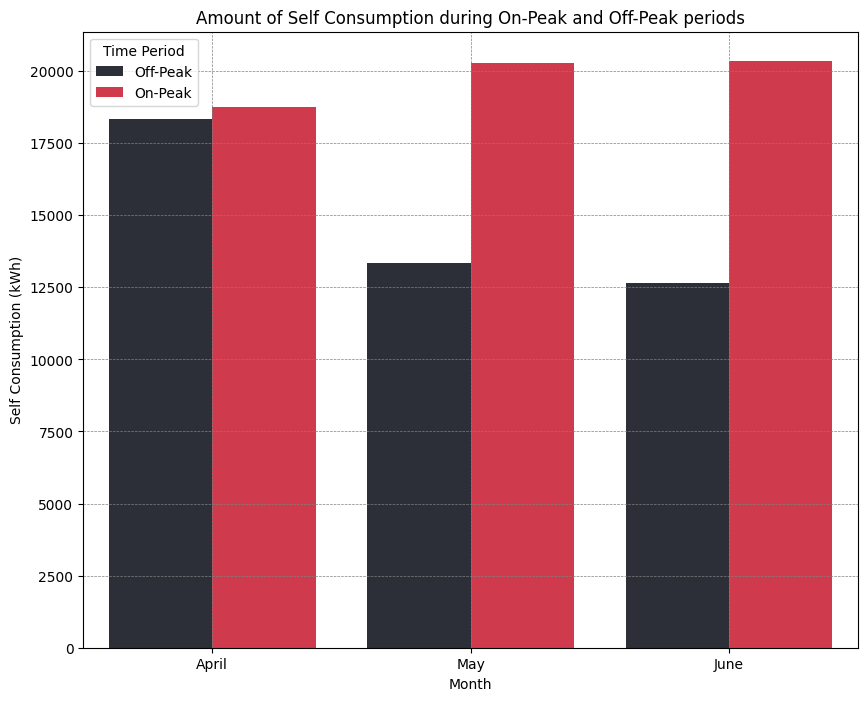

In [ ]:
grouped = df_SC.groupby(['Plant', 'Month','Time_Period'])[['Global Irradiation', 'Inverter Yield', 'Export Energy', 'Self Consumption']].sum().reset_index()
grouped = grouped.sort_values(['Plant', 'Month', 'Time_Period'])
grouped = grouped[grouped['Plant'] == 'Factory F1']

pal = {'Off-Peak': '#2a2e3a', 'On-Peak': '#e8223b'}
plt.figure(figsize=(10, 8))
sns.barplot(x='Month', y='Self Consumption', hue='Time_Period', data=grouped, palette=pal)
plt.xticks(ticks=[0, 1, 2], labels=['April', 'May', 'June'])
plt.xlabel('Month')
plt.ylabel('Self Consumption (kWh)')
plt.title('Amount of Self Consumption during On-Peak and Off-Peak periods')
plt.legend(title='Time Period')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)
plt.show()

In [ ]:
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4364 entries, 0 to 4363
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant               4364 non-null   object        
 1   Datetime            4364 non-null   datetime64[ns]
 2   Global Irradiation  4364 non-null   float64       
 3   Inverter Yield      4364 non-null   float64       
 4   Export Energy       4364 non-null   float64       
 5   Self Consumption    4364 non-null   float64       
 6   Humidity_mean       4364 non-null   float64       
 7   Temperature_mean    4364 non-null   float64       
 8   Date                4364 non-null   datetime64[ns]
 9   Time                4364 non-null   object        
 10  Time_Period         4364 non-null   object        
 11  Month               4364 non-null   period[M]     
dtypes: datetime64[ns](2), float64(6), object(3), period[M](1)
memory usage: 409.2+ KB


In [ ]:
df_SC = pd.concat([df_SC_W1, df_SC_F1], axis=0)
df_SC = pd.merge(df_SC, Peak_Calendar, on='Datetime', how='inner')
df_SC = df_SC.sort_values(['Plant', 'Datetime']).reset_index(drop=True)
df_SC.head(10)

Plant            Datetime  Global Irradiation  Inverter Yield  \
0  Factory F1 2022-04-01 00:00:00            0.000000            0.00   
1  Factory F1 2022-04-01 01:00:00            0.000000            0.00   
2  Factory F1 2022-04-01 02:00:00            0.000000            0.00   
3  Factory F1 2022-04-01 03:00:00            0.000000            0.00   
4  Factory F1 2022-04-01 04:00:00            0.000000            0.00   
5  Factory F1 2022-04-01 05:00:00            0.000000            0.00   
6  Factory F1 2022-04-01 06:00:00            0.023333            4.49   
7  Factory F1 2022-04-01 07:00:00            0.193611           42.45   
8  Factory F1 2022-04-01 08:00:00            0.424167           93.19   
9  Factory F1 2022-04-01 09:00:00            0.654167          134.87   

   Export Energy  Self Consumption  Humidity_mean  Temperature_mean  \
0            0.0              0.00      72.090909         30.963636   
1            0.0              0.00      72.681818         30.863636   
2            0.0              0.00      73.666667         30.758333   
3            0.0              0.00      74.590909         30.709091   
4            0.0              0.00      75.583333         30.641667   
5            0.0              0.00      76.125000         30.525000   
6            0.0              4.49      76.500000         30.433333   
7            0.0             42.45      76.541667         30.533333   
8            0.0             93.19      76.416667         30.825000   
9            0.0            134.87      75.272727         31.118182   

        Date      Time Time_Period  
0 2022-04-01  00:00:00    Off-Peak  
1 2022-04-01  01:00:00    Off-Peak  
2 2022-04-01  02:00:00    Off-Peak  
3 2022-04-01  03:00:00    Off-Peak  
4 2022-04-01  04:00:00    Off-Peak  
5 2022-04-01  05:00:00    Off-Peak  
6 2022-04-01  06:00:00    Off-Peak  
7 2022-04-01  07:00:00    Off-Peak  
8 2022-04-01  08:00:00    Off-Peak  
9 2022-04-01  09:00:00     On-Peak

In [ ]:
df_E = pd.concat([df_E_W1, df_E_F1], axis=0)
df_E = df_E.sort_values(['Plant', 'Device','Datetime']).reset_index(drop=True)
df_E.head(10)

Datetime       Plant   Device    Area  Humidity_mean  \
0 2022-04-01 00:00:00  Factory F1  ambient  Inside      70.937500   
1 2022-04-01 01:00:00  Factory F1  ambient  Inside      70.818182   
2 2022-04-01 02:00:00  Factory F1  ambient  Inside      71.722222   
3 2022-04-01 03:00:00  Factory F1  ambient  Inside      72.833333   
4 2022-04-01 04:00:00  Factory F1  ambient  Inside      73.833333   
5 2022-04-01 05:00:00  Factory F1  ambient  Inside      74.000000   
6 2022-04-01 06:00:00  Factory F1  ambient  Inside      74.423077   
7 2022-04-01 07:00:00  Factory F1  ambient  Inside      74.678571   
8 2022-04-01 08:00:00  Factory F1  ambient  Inside      74.750000   
9 2022-04-01 09:00:00  Factory F1  ambient  Inside      74.625000   

   Temperature_mean       Date      Time  
0         31.462500 2022-04-01  00:00:00  
1         31.427273 2022-04-01  01:00:00  
2         31.411111 2022-04-01  02:00:00  
3         31.366667 2022-04-01  03:00:00  
4         31.277778 2022-04-01  04:00:00  
5         31.190000 2022-04-01  05:00:00  
6         31.123077 2022-04-01  06:00:00  
7         31.107143 2022-04-01  07:00:00  
8         31.312500 2022-04-01  08:00:00  
9         31.516667 2022-04-01  09:00:00

In [ ]:
#df_SC.to_excel('Solar_Consumption.xlsx', index=False)
#df_E.to_excel('Environment.xlsx', index=False)